In [1]:
require(data.table)
require(ggplot2)
require(dplyr)
require(qqman)
require(tidyr)
setwd("/data/sarahgw/WGS/SNPS/All_mylu/snps/")

Loading required package: data.table
Loading required package: ggplot2
Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: qqman

For example usage please run: vignette('qqman')

Citation appreciated but not required:
Turner, S.D. qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. biorXiv DOI: 10.1101/005165 (2014).

Loading required package: tidyr


In [35]:
update.packages("dplyr")

In [2]:
nje=fread("mafs/NJ_E_filt1.mafs", header=FALSE)
nju=fread("mafs/NJ_U_filt1.mafs", header=FALSE)
nye=fread("mafs/NY_E_filt1.mafs", header=FALSE)
nyu=fread("mafs/NY_U_filt1.mafs", header=FALSE)
#vte=fread("~/WGS/SNPS/All_mylu/mafs/VT_E_filt1.mafs", header=FALSE)
#vtu=fread("~/WGS/SNPS/All_mylu/mafs/VT_U_filt1.mafs", header=FALSE)

Read 44829666 rows and 8 (of 8) columns from 2.119 GB file in 00:01:06
Read 44829666 rows and 8 (of 8) columns from 2.108 GB file in 00:01:06
Read 44829666 rows and 8 (of 8) columns from 2.112 GB file in 00:01:04
Read 44829666 rows and 8 (of 8) columns from 2.117 GB file in 00:01:09


In [3]:
colnames(nje)=c("Scaffold", "Position", "Major", "Minor", "Maf1_E", "Maf2_E", "Maf3_E", "nInd_E")
colnames(nye)=c("Scaffold", "Position", "Major", "Minor", "Maf1_E", "Maf2_E", "Maf3_E", "nInd_E")
#colnames(vte)=c("Scaffold", "Position", "Major", "Minor", "Maf1_E", "Maf2_E", "Maf3_E", "nInd_E")
colnames(nju)=c("Scaffold", "Position", "Major", "Minor", "Maf1_U", "Maf2_U", "Maf3_U", "nInd_U")
colnames(nyu)=c("Scaffold", "Position", "Major", "Minor", "Maf1_U", "Maf2_U", "Maf3_U", "nInd_U")
#colnames(vtu)=c("Scaffold", "Position", "Major", "Minor", "Maf1_U", "Maf2_U", "Maf3_U", "nInd_U")

In [4]:
njeu=merge(nje, nju, by=c("Scaffold", "Position"))
nyeu=merge(nye, nyu, by=c("Scaffold", "Position"))
#vteu=merge(vte, vtu, by=c("Scaffold", "Position"))

In [18]:
head(njeu)

Scaffold,Position,Major.x,Minor.x,Maf1_E,Maf2_E,Maf3_E,nInd_E,Major.y,Minor.y,Maf1_U,Maf2_U,Maf3_U,nInd_U
AAPE02055386,57060,T,C,0.000000,0.000005,0.000000,12,T,C,0.117731,0.032491,0.141014,9
AAPE02055386,67758,C,T,0.067869,0.022733,0.037396,10,C,T,0.100708,0.033446,0.071651,7
AAPE02055386,67765,C,T,0.000000,0.000003,0.000000,11,C,T,0.000000,0.000002,0.000000,6
AAPE02055386,67766,G,A,0.062912,0.020990,0.038813,11,G,A,0.000000,0.000002,0.000000,7
AAPE02055386,67785,G,A,0.000000,0.000002,0.000000,11,G,A,0.101246,0.033610,0.064823,7
AAPE02055386,67795,C,T,0.255406,0.255405,0.262683,12,C,T,0.343627,0.092649,0.340182,7


In [5]:
njeu=na.omit(njeu)
nyeu=na.omit(nyeu)
#vteu=na.omit(vteu)

In [ ]:
F^=1/L-1) sum(X0i-Xti)^2/(X0i+Xti)/2
(Mafpre-Mafpost)^2/(Mafpre+Mafpost)/2 do for both pre and post
    

In [6]:
F_mafs=function(x){
    minorpre=as.numeric(as.character(x[13]))
    minorpost=as.numeric(as.character(x[7]))
    majorpre=1-as.numeric(as.character(x[13]))
    majorpost=1-as.numeric(as.character(x[7]))
    F=sum(((minorpre-minorpost)^2/(minorpre+minorpost)/2), ((majorpre-majorpost)^2/(majorpre+majorpost/2)))
        return(F)     
          }

In [7]:
njF=apply(njeu, FUN=F_mafs, 1)

[1] 0.08513920 0.00621268        NaN 0.02042396 0.03533938 0.01082109

In [8]:
mean(njF, na.rm=TRUE)

[1] 0.0452501

In [9]:
nyF=apply(nyeu, FUN=F_mafs, 1)
mean(nyF, na.rm=TRUE)

[1] 0.04615609

In [11]:
njeu$diff=njeu$Maf2_E-njeu$Maf2_U
nyeu$diff=nyeu$Maf2_E-nyeu$Maf2_U
vteu$diff=vteu$Maf2_E-vteu$Maf2_U

In [48]:
njeu$diff2=njeu$Maf1_E-njeu$Maf1_U
nyeu$diff2=nyeu$Maf1_E-nyeu$Maf1_U
vteu$diff2=vteu$Maf1_E-vteu$Maf1_U

In [18]:
njnyeu=merge(njeu, nyeu, by=c("Scaffold", "Position"))
njnyvteu=merge(njnyeu, vteu, by=c("Scaffold", "Position"))

In [7]:
njnyvteu$diffav=rowMeans(cbind(njnyvteu$diff.y, njnyvteu$diff.x, njnyvteu$diff))

In [9]:
njeuneg=njeu[njeu$diff<0,]
nyeuneg=nyeu[nyeu$diff<0,]
vteuneg=vteu[vteu$diff<0,]

In [12]:
njeusnpsAll=njeu[!njeu$diff==0,]
nyeusnpsAll=nyeu[!nyeu$diff==0,]
vteusnpsAll=vteu[!vteu$diff==0,]

In [14]:
write.csv(vteusnpsAll, file="vteusnpsAll.csv")
write.csv(njeusnpsAll, file="njeusnpsAll.csv")
write.csv(nyeusnpsAll, file="nyeusnpsAll.csv")

In [3]:
vteusnpsAll=fread("vteusnpsAll.csv")
njeusnpsAll=fread("njeusnpsAll.csv")
nyeusnpsAll=fread("nyeusnpsAll.csv")

Read 43377745 rows and 16 (of 16) columns from 4.169 GB file in 00:04:59
Read 42925135 rows and 16 (of 16) columns from 4.084 GB file in 00:02:56
Read 42720936 rows and 16 (of 16) columns from 4.050 GB file in 00:03:05


In [6]:
nyout=fread("/local/home/sarahgw/WGS/SNPS/All_mylu/mafs/NY_U_noOut_filt.mafs")
#vtout=fread("/local/home/sarahgw/WGS/SNPS/All_mylu/mafs/VT_U_noOut_filt.mafs")

Read 44829616 rows and 8 (of 8) columns from 2.113 GB file in 00:00:52


We need to know how many filtered snps are changing in the same direction in nj and ny to calculate our number of tests for benjamini-hochberg


Have to have at least 6 individuals in a population

And have to have a max difference between exposed and unexposed of 8.

In [4]:
njnyeusnpsAll=merge(njeusnpsAll, nyeusnpsAll, by=c("Scaffold", "Position"))

## Parallelism calculations
(Proportion > 0.5 in pop 1) * (Proportion > 0.5 in pop 2) * (total # SNPs genotyped in both pops)

Both proportions should be calculated out of the pool of SNPs genotyped in both populations (e.g., don’t include any SNPs only genotyped in pop 1 or only in pop 2). You can even make this a binomial test, since this calculation will give you the fraction overlap expected.
                                                             
  1/10x1/10 x 1000... if theres no relationship between the two      you would expect 10 snps shared between the population that changed more than 0.5 
      
      See if the number is greater than that. if its less than that, its not evidence of shared allele freq change.
      
      Ok so predicted would be 44, actual is 242!

In [5]:
nrow(njnyeusnpsAll)

[1] 40952833

In [15]:
njeusnps50=njeusnpsAll[njeusnpsAll$diff>0.50,]
nyeusnps50=nyeusnpsAll[nyeusnpsAll$diff>0.50,]
nrow(njeusnps50)
nrow(nyeusnps50)
njnyeusnps50=njnyeusnpsAll[njnyeusnpsAll$diff.x>0.50& njnyeusnpsAll$diff.y>0.50,]
nrow(njnyeusnps50)

[1] 40349

[1] 44410

[1] 242

In [12]:
(40349/40952833)*(44410/40952833)*40952833

[1] 43.75519

In [19]:
colnames(njnyeusnpsAll)

[1] "Scaffold"  "Position"  "V1.x"      "Major.x.x" "Minor.x.x" "Maf1_E.x" 
 [7] "Maf2_E.x"  "Maf3_E.x"  "nInd_E.x"  "Major.y.x" "Minor.y.x" "Maf1_U.x" 
[13] "Maf2_U.x"  "Maf3_U.x"  "nInd_U.x"  "diff.x"    "V1.y"      "Major.x.y"
[19] "Minor.x.y" "Maf1_E.y"  "Maf2_E.y"  "Maf3_E.y"  "nInd_E.y"  "Major.y.y"
[25] "Minor.y.y" "Maf1_U.y"  "Maf2_U.y"  "Maf3_U.y"  "nInd_U.y"  "diff.y"

In [8]:
njnyeusnpsAll$nInd.x=abs(njnyeusnpsAll$nInd_E.x-njnyeusnpsAll$nInd_U.x)
njnyeusnpsAll$nInd.y=abs(njnyeusnpsAll$nInd_E.y-njnyeusnpsAll$nInd_U.y)

In [9]:
njnyeusnpsAllfilt=njnyeusnpsAll[njnyeusnpsAll$nInd.x<=8 & njnyeusnpsAll$nInd.y<=8 & njnyeusnpsAll$nInd_E.x>=6 & njnyeusnpsAll$nInd_E.y>=6 & njnyeusnpsAll$nInd_U.x>=6 & njnyeusnpsAll$nInd_U.x>=6 ,]

In [23]:
nrow(njnyeusnpsAllfilt)

[1] 38770178

In [10]:
njnyeuneg=njnyeusnpsAllfilt[njnyeusnpsAllfilt$diff.x<0 & njnyeusnpsAllfilt$diff.y<0,]

In [11]:
njnyeupos=njnyeusnpsAllfilt[njnyeusnpsAllfilt$diff.x>0 & njnyeusnpsAllfilt$diff.y>0,]

In [26]:
nrow(njnyeuneg)
nrow(njnyeupos)

[1] 9770296

[1] 9684232

In [27]:
9770296+9684232

[1] 19454528

In [8]:
norepeats=fread("/data/sarahgw/WGS/SNPS/All_mylu/snps/NJNY50_SNPs_nr_clean.csv")

Read 31517948 rows and 2 (of 2) columns from 0.522 GB file in 00:00:09


In [9]:
colnames(norepeats)=c("Scaffold", "Position")

In [12]:
njnyeuneg_nr=merge(norepeats, njnyeuneg, by=c("Scaffold", "Position"))

In [13]:
njnyeupos_nr=merge(norepeats, njnyeupos, by=c("Scaffold", "Position"))

In [18]:
nrow(njnyeuneg_nr)
nrow(njnyeupos_nr)

[1] 6863909

[1] 6797808

In [19]:
head(njnyeuneg_nr)

Scaffold,Position,V1.x,Major.x.x,Minor.x.x,Maf1_E.x,Maf2_E.x,Maf3_E.x,nInd_E.x,Major.y.x,⋯,nInd_E.y,Major.y.y,Minor.y.y,Maf1_U.y,Maf2_U.y,Maf3_U.y,nInd_U.y,diff.y,nInd.x,nInd.y
AAPE02055386,114592,14,C,G,0.000000,0.000003,0.000000,10,C,⋯,13,C,G,0.123946,0.041963,0.062209,11,-0.041960,1,2
AAPE02055720,35731,28,T,A,0.059102,0.016480,0.077724,15,T,⋯,14,T,A,0.051352,0.051353,0.068045,13,-0.035576,5,1
AAPE02055720,35760,29,A,C,0.000000,0.000003,0.000000,14,A,⋯,15,A,C,0.082161,0.082119,0.059263,16,-0.038610,4,1
AAPE02055720,35773,30,A,T,0.050285,0.050286,0.071665,15,A,⋯,13,A,T,0.076942,0.076942,0.084396,18,-0.028518,5,5
AAPE02055720,35839,33,G,T,0.000000,0.000002,0.000000,14,G,⋯,14,G,T,0.065685,0.065650,0.048374,19,-0.017307,7,5
AAPE02055720,35850,34,G,C,0.000000,0.000001,0.000000,13,G,⋯,14,G,C,0.035448,0.035447,0.039087,18,-0.027143,5,4


In [35]:
6863909+6797808

[1] 13661717

In [20]:
njnyeusnps_nrAll=rbind(njnyeuneg_nr, njnyeupos_nr)

In [23]:
write.csv(njnyeusnps_nrAll, file="~/WGS/SNPS/All_mylu/snps/njnyeu50snps_nrAll.csv")

In [22]:
NROW(njnyeusnps_nrAll)

[1] 13661717

In [86]:
NROW(njnyvteusnps2filt)

[1] 3010754

In [17]:
njnyeunegfilt=merge(njeunegfilt, nyeunegfilt, by=c("Scaffold", "Position"))

In [88]:
njnyvteuneg2filt=merge(njnyeunegfilt, vteunegfilt, by=c("Scaffold", "Position"))

In [89]:
NROW(njnyvteuneg2filt)

[1] 2962829

# Some possible things to look for in SNPs

## 1. "Hard" sweep 
High change in allele frequency, low (nonexistant?) starting allele frequency
High LD in large region around snp
Reduction in diversity around SNP

## 2. Soft sweep from SGV
High change in allele frequency, low starting allele frequency
High LD in small? region around snp in post--not pre?
Reduction in diversity around SNP smaller window? compare pre-post

## 3. Soft sweep from SGV across populations
Hard ish sweep within populations
High change in allele frequency within a population, low (nonexistant?) starting allele frequency
High LD in small? region around snp in post--not pre?
Reduction in diversity around SNP smaller window? compare pre-post

## 4.  Very soft sweep from SGV across populations.
Hard ish sweep within populations
High change in allele frequency within a population, High starting allele frequency
No signatures of LD or diversity


## 5. Very very soft sweep from SGV across populations.
Undetectable?





#  Compare genome-wide actual change in MAF vs simulated change to see if accurately representing drift

I have tried simulations with multiple ne values, tryng to get better approximations of drift. 


In [ ]:
njsim=fread("~/WGS/SNPS/All_mylu/snps/NJ_f1f2BS_Ne424_370_296.csv")
nysim=fread("~/WGS/SNPS/All_mylu/snps/NY_f1f2BS_Ne424_370_296.csv")

In [ ]:
njsim$diff=njsim$f2-njsim$f1
nysim$diff=nysim$f2-nysim$f1

In [ ]:
a=hist(njeusnpsAll$diff, plot=F, breaks=200)
s=hist(njsim$diff, plot=F, breaks=200)
    plot( s, col=rgb(1,0,0,1/4), xlim=c(-1,1.1), main=c("NJ \n Ne=424, 370, 296") ) 
    plot( a, col=rgb(0,0,1,1/4), add=T)
    legend("topright", c("actual", "simulated"), fill=c(col=rgb(0,0,1,1/4), col=rgb(1,0,0,1/4) ))

In [ ]:
plot(density(njeusnpsAll$diff), main=" Change in allele frequency NJ actual vs simulated \n Ne=424, 370, 296", xlim=c(-1,1), ylim=c(0, 10))
    lines(density(njsim$diff, na.rm=TRUE), col="red") 
legend("topright", c("actual", "simulated"), fill=c("black", "red"))

## How are sig snps in nj ny changing in VT?

In [ ]:
#read in mafs for all snps above .5 and list of significant snps with and without outliers
njnyeusnps_nrAll=fread("~/WGS/SNPS/All_mylu/snps/njnyeu50snps_nrAll.csv")

In [11]:
comPvaluesChrNJNY50sig=read.csv("~/WGS/SNPS/All_mylu/snps/NJNY502_sigCompvalues_nr_Ne424_296.csv", row.names=1)
comPvaluesChrNJNY50sig_out=read.csv("~/WGS/SNPS/All_mylu/snps/NJNY502noout_sigCompvalues_nr_Ne424_296.csv", row.names=1)

In [130]:
head(njnyeusnps_nrAll)

Scaffold,Position,V1.x,Major.x.x,Minor.x.x,Maf1_E.x,Maf2_E.x,Maf3_E.x,nInd_E.x,Major.y.x,⋯,nInd_E.y,Major.y.y,Minor.y.y,Maf1_U.y,Maf2_U.y,Maf3_U.y,nInd_U.y,diff.y,nInd.x,nInd.y
AAPE02055386,114592,14,C,G,0.000000,0.000003,0.000000,10,C,⋯,13,C,G,0.123946,0.041963,0.062209,11,-0.041960,1,2
AAPE02055720,35731,28,T,A,0.059102,0.016480,0.077724,15,T,⋯,14,T,A,0.051352,0.051353,0.068045,13,-0.035576,5,1
AAPE02055720,35760,29,A,C,0.000000,0.000003,0.000000,14,A,⋯,15,A,C,0.082161,0.082119,0.059263,16,-0.038610,4,1
AAPE02055720,35773,30,A,T,0.050285,0.050286,0.071665,15,A,⋯,13,A,T,0.076942,0.076942,0.084396,18,-0.028518,5,5
AAPE02055720,35839,33,G,T,0.000000,0.000002,0.000000,14,G,⋯,14,G,T,0.065685,0.065650,0.048374,19,-0.017307,7,5
AAPE02055720,35850,34,G,C,0.000000,0.000001,0.000000,13,G,⋯,14,G,C,0.035448,0.035447,0.039087,18,-0.027143,5,4


In [ ]:
colnames(comPvaluesChrNJNY50sig_out)=c("Scaffold", "NewScaf", "Position", "Major", "Minor", "NJ_Pval", "NY_Pval", "NY_outPval" ,"CombinedP", "rank", "BH")
colnames(comPvaluesChrNJNY50sig)=c("Scaffold",  "Position", "Major", "Minor", "NJ_Pval", "NY_Pval", "CombinedP", "rank", "BH")

In [ ]:
mafsNJNY50Sig=merge(njnyeusnps_nrAll, comPvaluesChrNJNY50sig, by=c("Scaffold", "Position"))

In [ ]:
mafsNJNY50Sigout=merge(njnyeusnps_nrAll, comPvaluesChrNJNY50sig_out, by=c("Scaffold", "Position"))

In [135]:
write.csv(mafsNJNY50Sigout, file="~/WGS/SNPS/All_mylu/snps/njnyeu50SigMafsout_nr.csv")

In [2]:
mafsNJNY50Sigout=read.csv("/data/sarahgw/WGS/SNPS/All_mylu/snps/njnyeu50SigMafsout_nr.csv")

In [ ]:
#njeusnpsAll=fread("njeusnpsAll.csv")
#nyeusnpsAll=fread("nyeusnpsAll.csv")
vteusnpsAll=fread("vteusnpsAll.csv")

In [ ]:
vteusnpsAll$V1=NULL
vteusnpsAll$Major.x=NULL
vteusnpsAll$Major.y=NULL
vteusnpsAll$Minor.x=NULL
vteusnpsAll$Minor.y=NULL

In [9]:
head(vteusnpsAll)

Scaffold,Position,Maf1_E,Maf2_E,Maf3_E,nInd_E,Maf1_U,Maf2_U,Maf3_U,nInd_U,diff
AAPE02055386,57060,0.000000,0.000003,0.000000,11,0.061269,0.061273,0.042754,13,-0.061270
AAPE02055386,67758,0.000000,0.000002,0.000000,11,0.088434,0.088438,0.081808,15,-0.088436
AAPE02055386,67765,0.064308,0.021521,0.085940,12,0.000000,0.000001,0.000000,14,0.021520
AAPE02055386,67766,0.000000,0.000002,0.000000,12,0.000000,0.000003,0.000000,14,-0.000001
AAPE02055386,67785,0.000000,0.000002,0.000000,11,0.039259,0.036176,0.017656,15,-0.036174
AAPE02055386,67795,0.152275,0.152275,0.187168,11,0.177171,0.177170,0.182416,14,-0.024895


In [ ]:
colnames(vteusnpsAll)=c("Scaffold", "Position", "Maf1_E.VT", "Maf2_E.VT", "Maf3_E.VT", "nInd_E.VT", "Maf1_U.VT", "Maf2_U.VT", "Maf3_U.VT", "nInd_U.VT", "diff.VT") 
head(vteusnpsAll)

In [ ]:
mafsNJNY50SigoutVT=merge(mafsNJNY50Sigout, vteusnpsAll, by=c("Scaffold", "Position"))

In [9]:
nyout=fread("/local/home/sarahgw/WGS/SNPS/All_mylu/mafs/NY_U_noOut_filt.mafs")
vtout=fread("/local/home/sarahgw/WGS/SNPS/All_mylu/mafs/VT_U_noOut_filt.mafs")

Read 44829616 rows and 8 (of 8) columns from 2.113 GB file in 00:00:55
Read 44829285 rows and 8 (of 8) columns from 2.117 GB file in 00:00:54


In [16]:
head(nyout)

chromo,position,major,minor,knownEM,unknownEM,phat,nInd
GL429767,78,G,A,0.000000,0.000003,0.000000,15
GL429767,104,A,T,0.096519,0.034151,0.104578,15
GL429767,112,G,A,0.000000,0.037773,0.000000,14
GL429767,195,C,T,0.049193,0.048816,0.035401,15
GL429767,196,T,C,0.055152,0.055157,0.032916,14
GL429767,202,A,G,0.312346,0.312350,0.294787,14


In [17]:
nyoutsig=merge(comPvaluesChrNJNY50sig_out, nyout, by.y=c("chromo", "position"), by.x=c("Scaffold", "SNP"))

In [18]:
vtoutsig=merge(comPvaluesChrNJNY50sig_out, vtout, by.y=c("chromo", "position"), by.x=c("Scaffold", "SNP"))

In [12]:
head(mafsNJNY50SigoutVT)

Scaffold,Position,X,V1.x,Major.x.x,Minor.x.x,Maf1_E.x,Maf2_E.x,Maf3_E.x,nInd_E.x,⋯,BH,Maf1_E.VT,Maf2_E.VT,Maf3_E.VT,nInd_E.VT,Maf1_U.VT,Maf2_U.VT,Maf3_U.VT,nInd_U.VT,diff.VT
GL429767,16839644,1,628751,T,A,0.137273,0.047404,0.145505,10,⋯,8.490880e-07,0.443794,0.443786,0.446321,16,0.433749,0.433736,0.443130,13,0.010050
GL429767,22649683,2,786282,T,A,0.536439,0.536439,0.519259,14,⋯,3.220679e-07,0.469791,0.469789,0.455652,22,0.499665,0.499657,0.503359,14,-0.029868
GL429767,46534125,3,1382080,C,T,0.140358,0.140358,0.159855,15,⋯,1.024761e-07,0.466411,0.466402,0.469326,13,0.482726,0.482573,0.458982,8,-0.016171
GL429768,29962249,4,2741227,A,G,0.659928,0.659926,0.725762,15,⋯,3.806257e-07,0.216655,0.216655,0.230230,15,0.418493,0.418489,0.426267,19,-0.201834
GL429768,3921142,5,2034756,G,C,0.241852,0.241860,0.228715,12,⋯,7.319724e-07,0.409229,0.409229,0.380887,15,0.416103,0.416102,0.403121,15,-0.006873
GL429768,9041952,6,2185951,A,G,0.339841,0.110988,0.310545,10,⋯,8.930063e-07,0.424000,0.423989,0.432855,14,0.327025,0.327024,0.330775,14,0.096965


In [19]:
mafsNJNY50SigoutVT$Maf2_U.NY=nyoutsig$unknownEM

In [20]:
mafsNJNY50SigoutVT$Maf2_U=vtoutsig$unknownEM

In [155]:
colnames(mafsNJNY50SigoutVT)

[1] "Scaffold"   "Position"   "V1.x"       "Major.x.x"  "Minor.x.x" 
 [6] "Maf1_E.x"   "Maf2_E.x"   "Maf3_E.x"   "nInd_E.x"   "Major.y.x" 
[11] "Minor.y.x"  "Maf1_U.x"   "Maf2_U.x"   "Maf3_U.x"   "nInd_U.x"  
[16] "diff.x"     "V1.y"       "Major.x.y"  "Minor.x.y"  "Maf1_E.y"  
[21] "Maf2_E.y"   "Maf3_E.y"   "nInd_E.y"   "Major.y.y"  "Minor.y.y" 
[26] "Maf1_U.y"   "Maf2_U.y"   "Maf3_U.y"   "nInd_U.y"   "diff.y"    
[31] "nInd.x"     "nInd.y"     "NewScaf"    "Major"      "Minor"     
[36] "NJ_Pval"    "NY_Pval"    "NY_outPval" "CombinedP"  "rank"      
[41] "BH"         "Maf1_E.VT"  "Maf2_E.VT"  "Maf3_E.VT"  "nInd_E.VT" 
[46] "Maf1_U.VT"  "Maf2_U.VT"  "Maf3_U.VT"  "nInd_U.VT"  "diff.VT"   
[51] "Maf2_U.NY"  "Maf2_U"

In [21]:
mafsNJNY50SigoutVT$diff.VT=mafsNJNY50SigoutVT$Maf2_E.VT-mafsNJNY50SigoutVT$Maf2_U.VT
mafsNJNY50SigoutVT$diff.NY=mafsNJNY50SigoutVT$Maf2_E.y-mafsNJNY50SigoutVT$Maf2_U.NY

In [159]:
write.csv(mafsNJNY50SigoutVT, file="~/WGS/SNPS/All_mylu/snps/njnyeu50SigMafsVT_nr.csv")

In [6]:
mafsNJNY50SigoutVT=read.csv("/data/sarahgw/WGS/SNPS/All_mylu/snps/njnyeu50SigMafsVT_nr.csv")

In [7]:
head(mafsNJNY50SigoutVT)

X,Scaffold,Position,V1.x,Major.x.x,Minor.x.x,Maf1_E.x,Maf2_E.x,Maf3_E.x,nInd_E.x,⋯,Maf3_E.VT,nInd_E.VT,Maf1_U.VT,Maf2_U.VT,Maf3_U.VT,nInd_U.VT,diff.VT,Maf2_U.NY,Maf2_U,diff.NY
1,GL429767,16839644,628751,T,A,0.137273,0.047404,0.145505,10,⋯,0.446321,16,0.433749,0.433736,0.443130,13,0.010050,0.904168,0.465020,-0.684128
2,GL429767,22649683,786282,T,A,0.536439,0.536439,0.519259,14,⋯,0.455652,22,0.499665,0.499657,0.503359,14,-0.029868,0.281664,0.468742,0.578550
3,GL429767,46534125,1382080,C,T,0.140358,0.140358,0.159855,15,⋯,0.469326,13,0.482726,0.482573,0.458982,8,-0.016171,0.583144,0.478787,-0.583142
4,GL429768,29962249,2741227,A,G,0.659928,0.659926,0.725762,15,⋯,0.230230,15,0.418493,0.418489,0.426267,19,-0.201834,0.000003,0.395477,0.636286
5,GL429768,3921142,2034756,G,C,0.241852,0.241860,0.228715,12,⋯,0.380887,15,0.416103,0.416102,0.403121,15,-0.006873,0.480474,0.406373,-0.417595
6,GL429768,9041952,2185951,A,G,0.339841,0.110988,0.310545,10,⋯,0.432855,14,0.327025,0.327024,0.330775,14,0.096965,0.852408,0.346007,-0.737559


density plot of starting and ending allele freeq

adjust smoothing window, 1.3 adjust=

look at direction of change and then subtract from 1 if it is negative. 
subset to about 1k non-outlliers make sure that they are pretty far away from the outliers, different scaffolds. 

In [22]:
nullNJ=njeusnpsAll[sample(1:nrow(njeusnpsAll), 5000, replace=FALSE),]
nullNY=nyeusnpsAll[sample(1:nrow(nyeusnpsAll), 5000, replace=FALSE),]
nullVT=vteusnpsAll[sample(1:nrow(vteusnpsAll), 5000, replace=FALSE),]

In [23]:
nullNJ=nullNJ[!nullNJ$Scaffold %in% mafsNJNY50SigoutVT$Scaffold,]
nullNY=nullNY[!nullNY$Scaffold %in% mafsNJNY50SigoutVT$Scaffold,]
nullVT=nullVT[!nullVT$Scaffold %in% mafsNJNY50SigoutVT$Scaffold,]

Plots excluding outliers

[1] "Scaffold"   "Position"   "V1.x"       "Major.x.x"  "Minor.x.x" 
 [6] "Maf1_E.x"   "Maf2_E.x"   "Maf3_E.x"   "nInd_E.x"   "Major.y.x" 
[11] "Minor.y.x"  "Maf1_U.x"   "Maf2_U.x"   "Maf3_U.x"   "nInd_U.x"  
[16] "diff.x"     "V1.y"       "Major.x.y"  "Minor.x.y"  "Maf1_E.y"  
[21] "Maf2_E.y"   "Maf3_E.y"   "nInd_E.y"   "Major.y.y"  "Minor.y.y" 
[26] "Maf1_U.y"   "Maf2_U.y"   "Maf3_U.y"   "nInd_U.y"   "diff.y"    
[31] "nInd.x"     "nInd.y"     "NewScaf"    "Major"      "Minor"     
[36] "NJ_Pval"    "NY_Pval"    "NY_outPval" "CombinedP"  "rank"      
[41] "BH"         "Maf1_E.VT"  "Maf2_E.VT"  "Maf3_E.VT"  "nInd_E.VT" 
[46] "Maf1_U.VT"  "Maf2_U.VT"  "Maf3_U.VT"  "nInd_U.VT"  "diff.VT"   
[51] "Maf2_U.NY"  "Maf2_U"     "diff.NY"

pdf 
  3

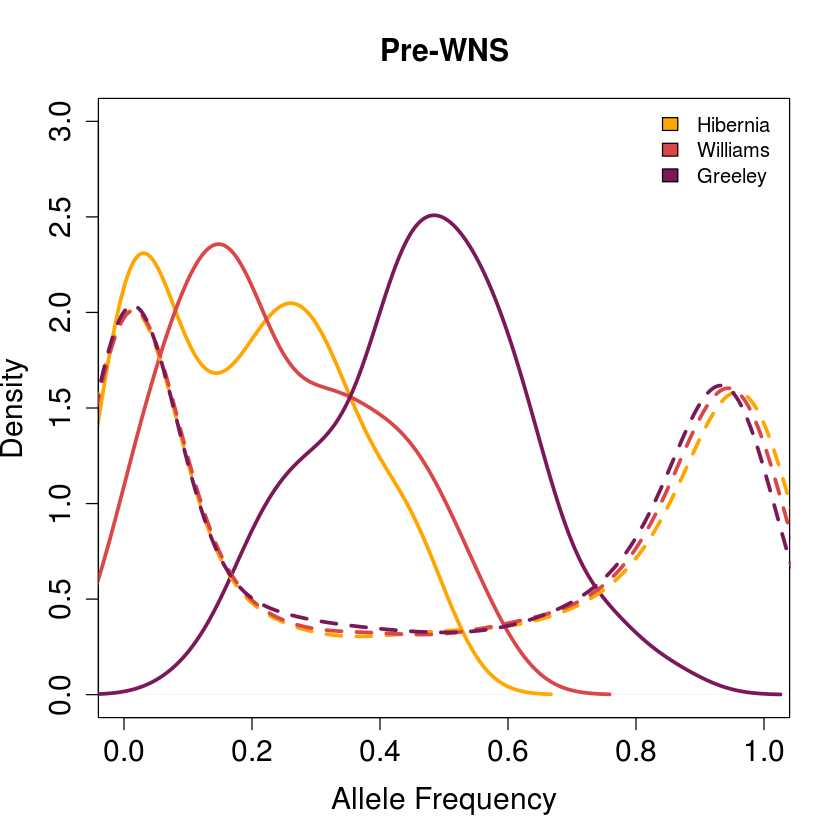

In [192]:
#pdf('/local/home/sarahgw/WGS/SNPS/All_mylu/plots/Pre_mafs_noout_nr.pdf')

plot(density(ifelse(mafsNJNY50SigoutVT$diff.x<0, 1-mafsNJNY50SigoutVT$Maf2_U.x, mafsNJNY50SigoutVT$Maf2_U.x)), lwd=3, col="#ffa600", main="Pre-WNS", cex.main=1.5, xlab="Allele Frequency", cex.lab=1.5, cex.axis=1.5, xlim = c(-0,1), ylim=c(0,3), family="sans")
lines(density(ifelse(mafsNJNY50SigoutVT$diff.y<0, 1-mafsNJNY50SigoutVT$Maf2_U.NY, mafsNJNY50SigoutVT$Maf2_U.y)), lwd=3, col="#da4749") 
lines(density(ifelse(mafsNJNY50SigoutVT$diff.VT<0, 1-mafsNJNY50SigoutVT$Maf2_U, mafsNJNY50SigoutVT$Maf2_U.VT)), lwd=3, col="#7b1958") 
lines(density(ifelse(nullNJ$diff<0, 1-nullNJ$Maf2_U, nullNJ$Maf2_U)), col="#ffa600", lty=2, lwd=3)
lines(density(ifelse(nullNY$diff<0, 1-nullNY$Maf2_U, nullNY$Maf2_U)), col="#da4749", lty=2, lwd=3)
lines(density(ifelse(nullVT$diff<0, 1-nullVT$Maf2_U, nullVT$Maf2_U)), col="#7b1958", lty=2, lwd=3)
legend("topright", c("Hibernia", "Williams", "Greeley"), fill=c("#ffa600", "#da4749", "#7b1958"), bty="n")

dev.off()

pdf 
  3

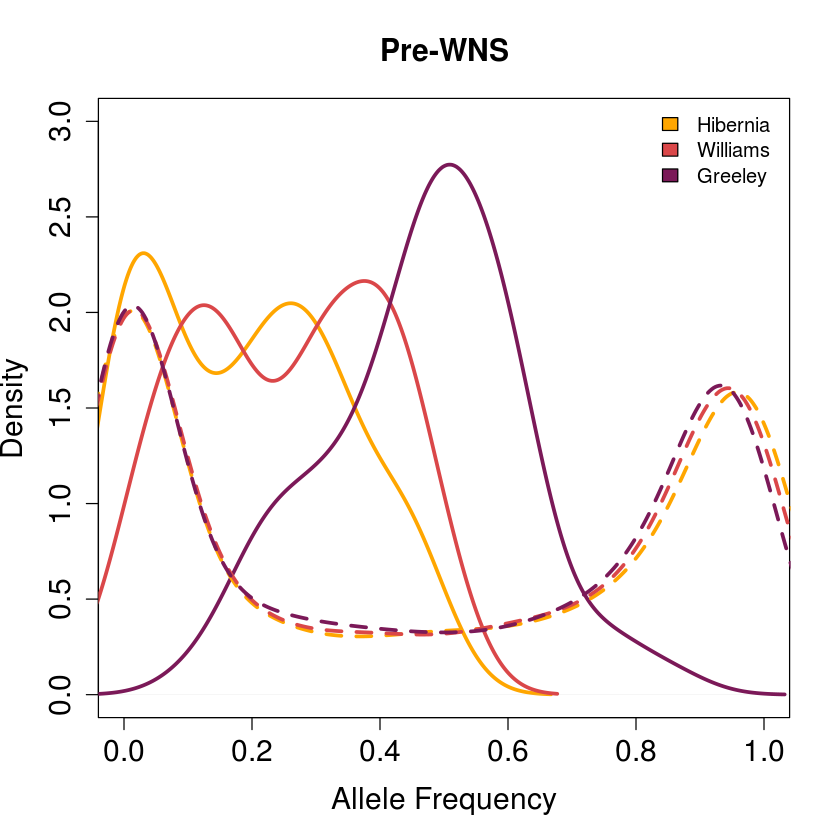

In [190]:
#pdf('/local/home/sarahgw/WGS/SNPS/All_mylu/plots/Pre_mafs_nr.pdf')

plot(density(ifelse(mafsNJNY50SigoutVT$diff.x<0, 1-mafsNJNY50SigoutVT$Maf2_U.x, mafsNJNY50SigoutVT$Maf2_U.x)), lwd=3, col="#ffa600", main="Pre-WNS", cex.main=1.5, xlab="Allele Frequency", cex.lab=1.5, cex.axis=1.5, xlim = c(-0,1), ylim=c(0,3), family="sans")
lines(density(ifelse(mafsNJNY50SigoutVT$diff.y<0, 1-mafsNJNY50SigoutVT$Maf2_U.y, mafsNJNY50SigoutVT$Maf2_U.y)), lwd=3, col="#da4749") 
lines(density(ifelse(mafsNJNY50SigoutVT$diff.VT<0, 1-mafsNJNY50SigoutVT$Maf2_U.VT, mafsNJNY50SigoutVT$Maf2_U.VT)), lwd=3, col="#7b1958") 
lines(density(ifelse(nullNJ$diff<0, 1-nullNJ$Maf2_U, nullNJ$Maf2_U)), col="#ffa600", lty=2, lwd=3)
lines(density(ifelse(nullNY$diff<0, 1-nullNY$Maf2_U, nullNY$Maf2_U)), col="#da4749", lty=2, lwd=3)
lines(density(ifelse(nullVT$diff<0, 1-nullVT$Maf2_U, nullVT$Maf2_U)), col="#7b1958", lty=2, lwd=3)
legend("topright", c("Hibernia", "Williams", "Greeley"), fill=c("#ffa600", "#da4749", "#7b1958"), bty="n")

dev.off()

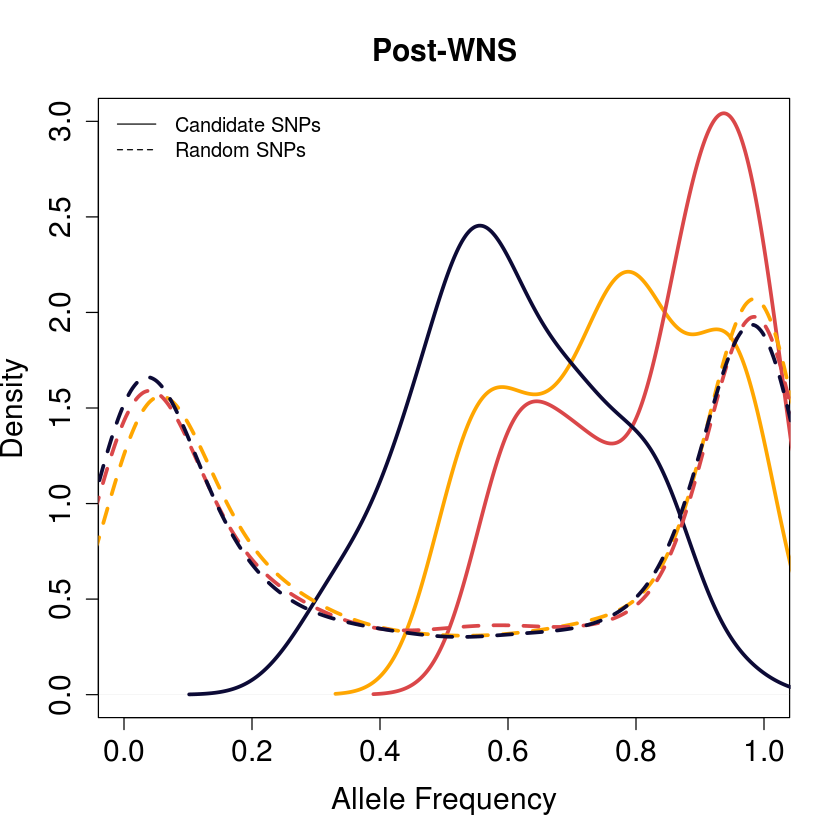

In [25]:
#pdf('/local/home/sarahgw/WGS/SNPS/All_mylu/plots/Post_mafs_nr.pdf')

plot(density(ifelse(mafsNJNY50SigoutVT$diff.x<0, 1-mafsNJNY50SigoutVT$Maf2_E.x, mafsNJNY50SigoutVT$Maf2_E.x)), lwd=3, col="#ffa600", main="Post-WNS", cex.main=1.5, xlab="Allele Frequency", cex.lab=1.5, cex.axis=1.5, xlim = c(-0,1), ylim=c(0,3))
lines(density(ifelse(mafsNJNY50SigoutVT$diff.y<0, 1-mafsNJNY50SigoutVT$Maf2_E.y, mafsNJNY50SigoutVT$Maf2_E.y)), lwd=3, col="#da4749") 
lines(density(ifelse(mafsNJNY50SigoutVT$diff.VT<0, 1-mafsNJNY50SigoutVT$Maf2_E.VT, mafsNJNY50SigoutVT$Maf2_E.VT)), lwd=3, col="#0c0a36") 
lines(density(ifelse(nullNJ$diff<0, 1-nullNJ$Maf2_E, nullNJ$Maf2_E)), col="#ffa600", lty=2, lwd=3)
lines(density(ifelse(nullNY$diff<0, 1-nullNY$Maf2_E, nullNY$Maf2_E)), col="#da4749", lty=2, lwd=3)
lines(density(ifelse(nullVT$diff<0, 1-nullVT$Maf2_E, nullVT$Maf2_E)), col="#0c0a36", lty=2, lwd=3)
#legend("topleft", c("Hibernia", "Williams", "Aeolus"), fill=c("#ffa600", "#da4749", "#0c0a36"), bty="n")
legend("topleft", c("Candidate SNPs", "Random SNPs"), lty=c(1, 2), bty="n")
#dev.off()

In [13]:
head(mafsNJNY50SigoutVT)

Scaffold,Position,X,V1.x,Major.x.x,Minor.x.x,Maf1_E.x,Maf2_E.x,Maf3_E.x,nInd_E.x,⋯,BH,Maf1_E.VT,Maf2_E.VT,Maf3_E.VT,nInd_E.VT,Maf1_U.VT,Maf2_U.VT,Maf3_U.VT,nInd_U.VT,diff.VT
GL429767,16839644,1,628751,T,A,0.137273,0.047404,0.145505,10,⋯,8.490880e-07,0.443794,0.443786,0.446321,16,0.433749,0.433736,0.443130,13,0.010050
GL429767,22649683,2,786282,T,A,0.536439,0.536439,0.519259,14,⋯,3.220679e-07,0.469791,0.469789,0.455652,22,0.499665,0.499657,0.503359,14,-0.029868
GL429767,46534125,3,1382080,C,T,0.140358,0.140358,0.159855,15,⋯,1.024761e-07,0.466411,0.466402,0.469326,13,0.482726,0.482573,0.458982,8,-0.016171
GL429768,29962249,4,2741227,A,G,0.659928,0.659926,0.725762,15,⋯,3.806257e-07,0.216655,0.216655,0.230230,15,0.418493,0.418489,0.426267,19,-0.201834
GL429768,3921142,5,2034756,G,C,0.241852,0.241860,0.228715,12,⋯,7.319724e-07,0.409229,0.409229,0.380887,15,0.416103,0.416102,0.403121,15,-0.006873
GL429768,9041952,6,2185951,A,G,0.339841,0.110988,0.310545,10,⋯,8.930063e-07,0.424000,0.423989,0.432855,14,0.327025,0.327024,0.330775,14,0.096965


## individual snp trajectories 
need to reorganize so that its scaffold, position, Site, Time, Frequency. 

In [1]:
mafsSimp=mafsNJNY50SigoutVT[c("Scaffold", "Position", "Maf2_E.x", "Maf2_U.x", "Maf2_E.y", "Maf2_U.y", "Maf2_E.VT", "Maf2_U.VT")]
colnames(mafsSimp)=c("Scaffold", "Position", "NJ_Post", "NJ_Pre", "NY_Post", "NY_Pre", "VT_Post", "VT_Pre")
head(mafsSimp)

ERROR: Error in eval(expr, envir, enclos): object 'mafsNJNY50SigoutVT' not found


In [21]:
mafsSimp=pivot_longer(mafsSimp,
  cols = 3:8,
  names_to = c("Site", "Time"),
  names_pattern = "(.*)_(.*)",
  values_to = "maf"
)

In [32]:
head(mafsSimp)

Scaffold,Position,Site,Time,maf
GL429767,16839644,NJ,Post,0.047404
GL429767,16839644,NJ,Pre,0.665153
GL429767,16839644,NY,Post,0.220040
GL429767,16839644,NY,Pre,0.925564
GL429767,16839644,VT,Post,0.443786
GL429767,16839644,VT,Pre,0.433736


In [51]:
mafsSimp$Position=as.character(mafsSimp$Position)

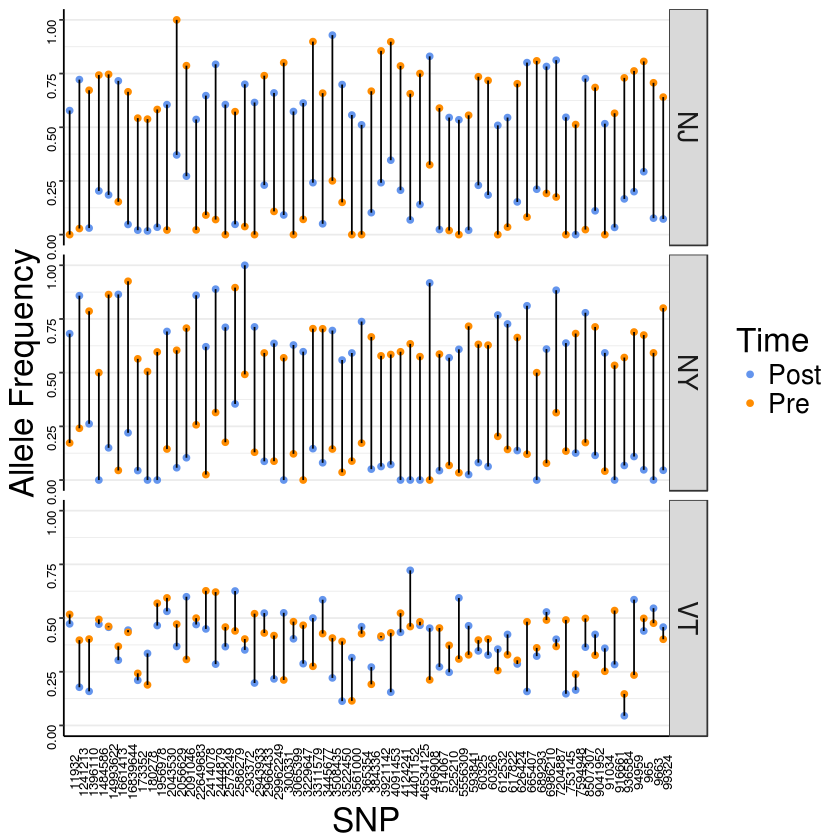

In [66]:
ggplot(mafsSimp, aes(x=Position, y=maf)) +
    geom_point(aes(color=Time)) +
    scale_color_manual(values=c("cornflowerblue", "darkorange"))+
    geom_line()+
    theme_bw() +
    xlab("SNP")+
    ylab("Allele Frequency")+
    facet_grid(Site~.)+
    theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black", size=8, angle=90),
          text = element_text(size=20)
    )

In [15]:
colnames(mafsNJNY50SigoutVT)

[1] "Scaffold"   "Position"   "X"          "V1.x"       "Major.x.x" 
 [6] "Minor.x.x"  "Maf1_E.x"   "Maf2_E.x"   "Maf3_E.x"   "nInd_E.x"  
[11] "Major.y.x"  "Minor.y.x"  "Maf1_U.x"   "Maf2_U.x"   "Maf3_U.x"  
[16] "nInd_U.x"   "diff.x"     "V1.y"       "Major.x.y"  "Minor.x.y" 
[21] "Maf1_E.y"   "Maf2_E.y"   "Maf3_E.y"   "nInd_E.y"   "Major.y.y" 
[26] "Minor.y.y"  "Maf1_U.y"   "Maf2_U.y"   "Maf3_U.y"   "nInd_U.y"  
[31] "diff.y"     "nInd.x"     "nInd.y"     "NewScaf"    "Major"     
[36] "Minor"      "NJ_Pval"    "NY_Pval"    "NY_outPval" "CombinedP" 
[41] "rank"       "BH"         "Maf1_E.VT"  "Maf2_E.VT"  "Maf3_E.VT" 
[46] "nInd_E.VT"  "Maf1_U.VT"  "Maf2_U.VT"  "Maf3_U.VT"  "nInd_U.VT" 
[51] "diff.VT"

In [3]:
mafsNJNY50SigVT$avNJNY=apply(X=cbind(mafsNJNY50SigVT$Maf2_E.NJ, mafsNJNY50SigVT$Maf2_E.NY), 1, FUN=mean)

In [9]:
abs(mafsNJNY50SigVT$avNJNY-mafsNJNY50SigVT$Maf2_E.VT)

[1] 0.3100640 0.2285375 0.1318995 0.3962220 0.1464555 0.4314525 0.2378520
 [8] 0.2568595 0.1033175 0.3884080 0.2895150 0.1978960 0.4467080 0.0220565
[15] 0.2586250 0.1017850 0.4066015 0.6480835 0.5340740 0.0934425 0.4448020
[22] 0.0446715 0.1615845 0.1680325 0.3260450 0.3177045 0.1647095 0.2707575
[29] 0.4990490 0.3641865 0.3685605 0.5158095 0.2832040 0.3300740 0.4111710
[36] 0.2632175 0.5423065 0.2433975 0.6880225 0.3298565 0.4784850 0.4987150
[43] 0.1977965 0.1251080 0.1684995 0.2917175 0.1537075 0.1952095 0.4478390
[50] 0.1173755 0.5914035 0.2488185 0.4870115 0.0551545 0.1847475 0.2195175
[57] 0.6123905 0.4666845 0.3153240 0.1801385 0.2914250 0.5557070 0.3696450
[64] 0.2168920 0.4476725 0.2919285 0.2787280 0.7459755 0.3987345 0.0125575
[71] 0.3267780 0.4864545 0.4211535 0.0721930 0.6127460 0.2862765 0.2668705
[78] 0.1566845 0.1915310 0.4413145 0.3099500 0.2822450 0.2386620 0.1142035
[85] 0.0759515 0.2301720 0.1777020 0.1949540 0.2665965 0.5073830 0.2452020
[92] 0.1339015

In [14]:
mafsNJNY50SigVT[abs(mafsNJNY50SigVT$avNJNY-mafsNJNY50SigVT$Maf2_E.VT)<.2& abs(mafsNJNY50SigVT$avNJNY-mafsNJNY50SigVT$Maf2_E.VT)>0.15,]

,X,Scaffold,Position,Major,Minor,Maf1_E.NJ,Maf2_E.NJ,Maf3_E.NJ,nInd_E.NJ,Maf1_U.NJ,⋯,Maf1_E.VT,Maf2_E.VT,Maf3_E.VT,nInd_E.VT,Maf1_U.VT,Maf2_U.VT,Maf3_U.VT,nInd_U.VT,diff.VT,avNJNY
12,12,GL429772,8716095,T,A,0.068201,0.021217,0.054064,9,0.596163,⋯,0.208508,0.208506,0.218485,14,0.432492,0.432494,0.426162,15,-0.223988,0.0106100
23,23,GL429795,3907289,G,A,0.515268,0.515268,0.478842,9,0.000000,⋯,0.464040,0.464039,0.427429,15,0.178136,0.178136,0.188822,14,0.285903,0.6256235
24,24,GL429801,6986210,A,T,0.783029,0.783026,0.808951,16,0.192008,⋯,0.528386,0.528386,0.524618,20,0.490614,0.490612,0.491786,14,0.037774,0.6964185
27,27,GL429819,365354,G,A,0.511295,0.511297,0.510407,13,0.000000,⋯,0.459926,0.459913,0.465448,17,0.426831,0.426831,0.400215,13,0.033082,0.6246225
43,43,GL429861,3065399,A,G,0.573445,0.573441,0.586570,13,0.000000,⋯,0.403306,0.403296,0.411588,14,0.483136,0.483136,0.449388,12,-0.079840,0.6010925
45,45,GL429861,4317523,T,C,0.621081,0.621073,0.624336,15,0.241259,⋯,0.456438,0.456439,0.422066,13,0.264624,0.264624,0.270439,12,0.191815,0.6249385
47,47,GL429873,2056629,T,A,0.371091,0.371093,0.387491,13,1.000004,⋯,0.367880,0.367884,0.369602,11,0.471649,0.471641,0.477832,15,-0.103757,0.2141765
48,48,GL429879,384336,G,A,0.102340,0.102339,0.112219,14,0.668032,⋯,0.272225,0.271775,0.282173,14,0.191546,0.191546,0.193632,13,0.080229,0.0765655
55,55,GL429910,2414078,A,C,0.647307,0.647299,0.648064,14,0.091366,⋯,0.449287,0.449272,0.449900,13,0.626906,0.626903,0.623197,9,-0.177631,0.6340195
60,60,GL429946,1039079,T,A,0.735810,0.735806,0.766927,14,0.224259,⋯,0.479478,0.479470,0.482724,13,0.470160,0.470154,0.527251,15,0.009316,0.6596085


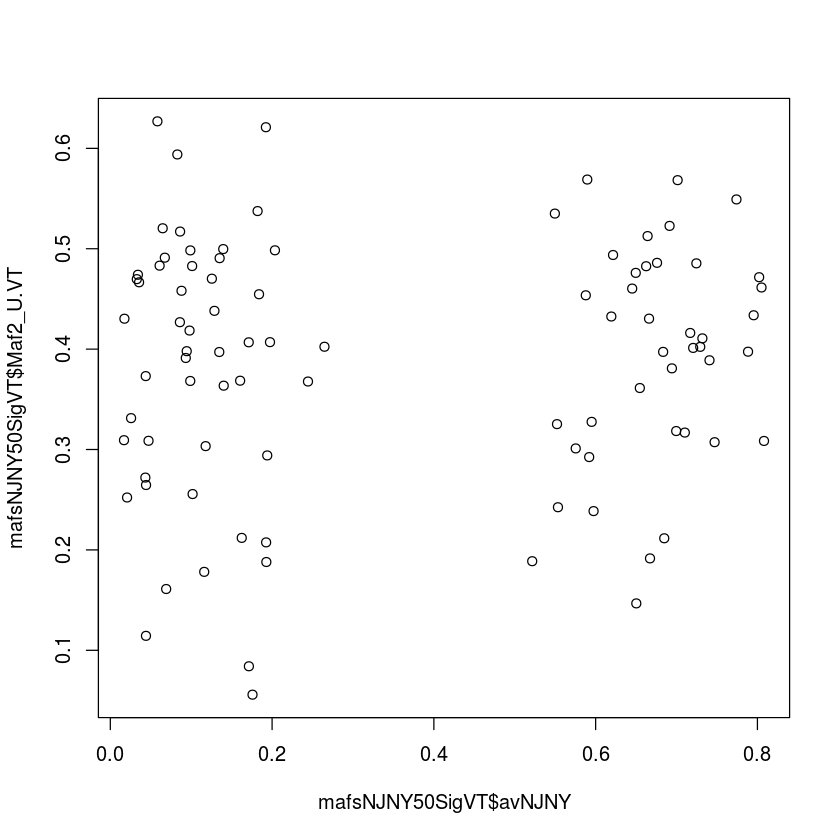

In [63]:
plot(mafsNJNY50SigVT$avNJNY, mafsNJNY50SigVT$Maf2_U.VT)

In [4]:
mafsNJNY50SigVT$logP=(-log(mafsNJNY50SigVT$CombinedP))

In [5]:
head(mafsNJNY50SigVT$Maf1_E.NJ, 10)

[1] 0.137273 0.536439 0.714101 0.140358 0.712276 0.659928 0.285655 0.241852
 [9] 0.279313 0.726631

In [43]:
mafsNJNY50SigVT$VTstar=ifelse(mafsNJNY50SigVT$diff.NJ>0.5, ifelse(
    pmax(mafsNJNY50SigVT$Maf2_E.NJ, mafsNJNY50SigVT$Maf2_E.NY)-mafsNJNY50SigVT$Maf2_E.VT>pmax(mafsNJNY50SigVT$Maf2_E.NJ, mafsNJNY50SigVT$Maf2_E.NY)/2, "NO", "YES"
), ifelse(
    mafsNJNY50SigVT$Maf2_E.VT-pmin(mafsNJNY50SigVT$Maf2_E.NJ, mafsNJNY50SigVT$Maf2_E.NY)>(1-pmin(mafsNJNY50SigVT$Maf2_E.NJ, mafsNJNY50SigVT$Maf2_E.NY))/2, "NO", "YES"
))

## Plot all the snps with sig ones highlighted

In [2]:
#read in mafs for all snps
njnyeusnpAll=fread("/data/sarahgw/WGS/SNPS/All_mylu/snps/njnyeu50Allsnps.csv") 

Read 40952833 rows and 32 (of 32) columns from 7.857 GB file in 00:05:26


In [49]:
head(njnyeusnpAll)

V1,Scaffold,Position,V1.x,Major.x.x,Minor.x.x,Maf1_E.x,Maf2_E.x,Maf3_E.x,nInd_E.x,⋯,Maf3_E.y,nInd_E.y,Major.y.y,Minor.y.y,Maf1_U.y,Maf2_U.y,Maf3_U.y,nInd_U.y,diff.y,avdiffnjny
1,AAPE02055386,57060,1,T,C,0.000000,0.000005,0.000000,12,⋯,0.000000,11,T,C,0.000000,0.000005,0.000000,12,0.000001,-0.0162425
2,AAPE02055386,67758,2,C,T,0.067869,0.022733,0.037396,10,⋯,0.000000,10,C,T,0.043370,0.043371,0.061623,19,-0.043368,-0.0270405
3,AAPE02055386,67765,1,C,T,0.000000,0.000003,0.000000,11,⋯,0.000000,11,C,T,0.038368,0.037756,0.041336,19,-0.037752,-0.0188755
4,AAPE02055386,67766,2,G,A,0.062912,0.020990,0.038813,11,⋯,0.000000,10,G,A,0.037757,0.012754,0.040748,19,-0.012751,0.0041185
5,AAPE02055386,67785,3,G,A,0.000000,0.000002,0.000000,11,⋯,0.000000,11,G,A,0.000000,0.000002,0.000000,18,0.000002,-0.0168030
6,AAPE02055386,67795,3,C,T,0.255406,0.255405,0.262683,12,⋯,0.204537,11,C,T,0.273954,0.273961,0.232749,18,-0.068610,0.0470730


In [3]:
#list of snps not in repeat regions
norepeats=fread("/data/sarahgw/WGS/SNPS/All_mylu/snps/NJNY50_SNPs_nr_clean.csv")

Read 31517948 rows and 2 (of 2) columns from 0.522 GB file in 00:00:07


In [4]:
colnames(norepeats)=c("Scaffold", "Position")

In [5]:
njnyeusnpAll_nr=merge(njnyeusnpAll, norepeats, by=c("Scaffold", "Position"))

In [6]:
head(njnyeusnpAll)

V1,Scaffold,Position,V1.x,Major.x.x,Minor.x.x,Maf1_E.x,Maf2_E.x,Maf3_E.x,nInd_E.x,⋯,Maf3_E.y,nInd_E.y,Major.y.y,Minor.y.y,Maf1_U.y,Maf2_U.y,Maf3_U.y,nInd_U.y,diff.y,avdiffnjny
1,AAPE02055386,57060,1,T,C,0.000000,0.000005,0.000000,12,⋯,0.000000,11,T,C,0.000000,0.000005,0.000000,12,0.000001,-0.0162425
2,AAPE02055386,67758,2,C,T,0.067869,0.022733,0.037396,10,⋯,0.000000,10,C,T,0.043370,0.043371,0.061623,19,-0.043368,-0.0270405
3,AAPE02055386,67765,1,C,T,0.000000,0.000003,0.000000,11,⋯,0.000000,11,C,T,0.038368,0.037756,0.041336,19,-0.037752,-0.0188755
4,AAPE02055386,67766,2,G,A,0.062912,0.020990,0.038813,11,⋯,0.000000,10,G,A,0.037757,0.012754,0.040748,19,-0.012751,0.0041185
5,AAPE02055386,67785,3,G,A,0.000000,0.000002,0.000000,11,⋯,0.000000,11,G,A,0.000000,0.000002,0.000000,18,0.000002,-0.0168030
6,AAPE02055386,67795,3,C,T,0.255406,0.255405,0.262683,12,⋯,0.204537,11,C,T,0.273954,0.273961,0.232749,18,-0.068610,0.0470730


In [45]:
#p values with and without outliers
#comPvaluesChrNJNY50sig=fread("~/WGS/SNPS/All_mylu/snps/NJNY502_sigCompvalues_nr_Ne424_296.csv")
comPvaluesChrNJNY50outsig=read.csv("/data/sarahgw/WGS/SNPS/All_mylu/snps/NJNY502noout_sigCompvalues_nr_Ne424_296.csv")
#comPvaluesChrNJNY50sig_out=fread("~/WGS/SNPS/All_mylu/snps/NJNY502noout_sigCompvalues_nr_Ne424_296.csv")

In [46]:
nrow(comPvaluesChrNJNY50outsig)

[1] 62

In [47]:
head(comPvaluesChrNJNY50outsig)

X,Scaffold,NewScaf,SNP,Maj,Min,NJ,NY,NY_out,Comp,rank,padjBH
1,GL429767,NW_005871048.1,22649683,T,A,6.589993e-04,9.999990e-07,4.999995e-06,6.764905e-08,22,3.220679e-07
2,GL429767,NW_005871048.1,16839644,T,A,8.399992e-05,1.819998e-04,4.969995e-04,7.511125e-07,58,8.490880e-07
3,GL429767,NW_005871048.1,46534125,C,T,6.699993e-05,9.999990e-07,9.999990e-07,1.636561e-09,7,1.024761e-07
4,GL429768,NW_005871049.1,29962249,A,G,9.999990e-07,5.812994e-03,5.241995e-03,1.051887e-07,26,3.806257e-07
5,GL429768,NW_005871049.1,9041952,A,G,4.896895e-02,1.599998e-05,9.999990e-07,8.732174e-07,61,8.930063e-07
6,GL429768,NW_005871049.1,3921142,G,C,9.999990e-07,1.383999e-02,2.807497e-02,5.162530e-07,50,7.319724e-07


In [48]:
#cut down the maf dtaframe
allsnps=njnyeusnpAll_nr[,c("V1","Scaffold", "Position", "avdiffnjny")]

In [49]:
#cut down sig dataframe
SNPsout=comPvaluesChrNJNY50outsig[,c("Scaffold", "SNP", "Comp")]
#SNPs=comPvaluesChrNJNY50sig[,c("Scaffold", "SNP")]

In [50]:
colnames(SNPsout)=c("Scaf", "BP", "Comp")
#colnames(SNPs)=c("Scaf", "BP")

In [51]:
#without outliers get a code of one, with gets 2 so you can highlight both on graphs
SNPsout$SNP=1
#SNPs$SNP=2

In [52]:
nrow(SNPsout)

[1] 62

In [14]:
nrow(SNPsout)

[1] 62

In [8]:
#prepare maf dataframe for plotting
colnames(allsnps)=c("BPCum","Scaf", "BP", "P")
allsnps$CHR=as.numeric(as.factor(allsnps$Scaf))

In [45]:
#reduce the number of points so graph plots eaiser with outliers
allsnpshi=merge(allsnps, SNPs, by=c("Scaf", "BP"), all.x=TRUE)
allsnpshiscaf=allsnpshi[allsnpshi$Scaf %in% SNPs$Scaf,]
allsnpshiscaf$CHR=as.numeric(as.factor(allsnpshiscaf$CHR))
NROW(allsnpshiscaf[allsnpshiscaf$P<0.35 & allsnpshiscaf$P>(-0.35),])
allsnpshiscafsub=allsnpshiscaf[-sample(which(P<0.26 & P>(-0.26)), 410000)]

[1] 7520935

In [46]:
NROW(allsnpshiscaf)
NROW(allsnpshiscafsub)
length(unique(allsnpshiscafsub$CHR))

[1] 7538143

[1] 7128143

[1] 63

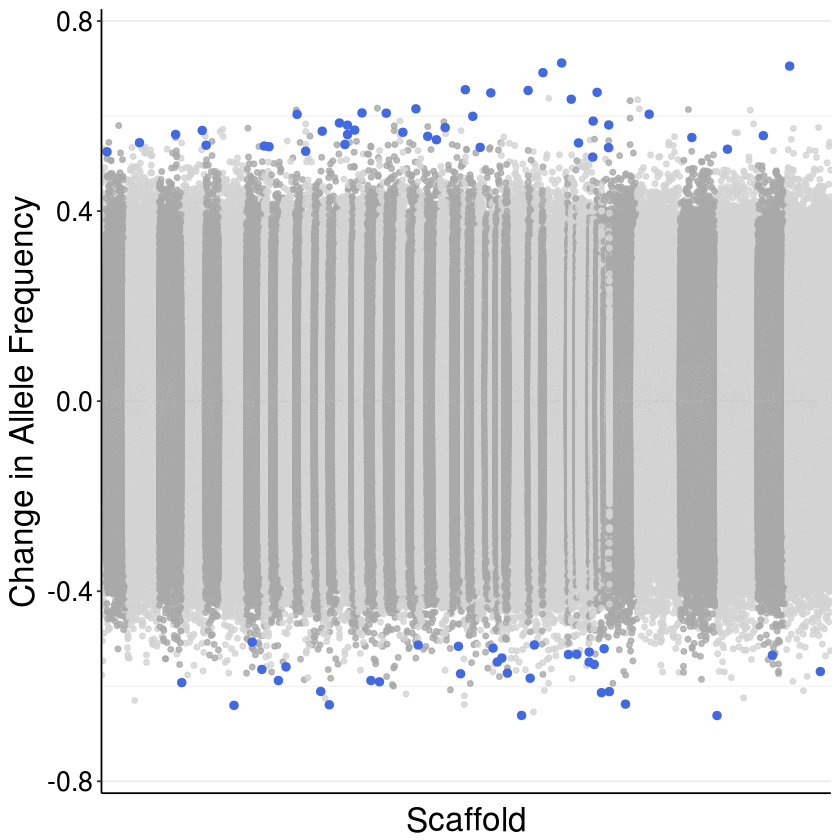

In [47]:
#plot with outliers
ggplot(allsnpshiscafsub, aes(x=BPCum, y=P)) +
    geom_point( aes(color=as.factor(CHR)), alpha=0.8, size=1.3) +
    scale_color_manual(values = rep(c("lightgrey", "darkgrey"), 53 )) +
    geom_point(data=subset(allsnpshiscafsub, SNP==2), color="royalblue", size=2) +    
    theme_bw() +
    xlab("Scaffold")+
    ylab("Change in Allele Frequency")+
    ylim(-.75, .75)+
    theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20)
    )

In [48]:
ggsave("/local/home/sarahgw/WGS/SNPS/All_mylu/plots/sigSNPsMafs_nr.jpg", device="jpeg", h=8, w=8) 

In [49]:
#reduce the number of points so graph plots eaiser without outliers
allsnpshiout=merge(allsnps, SNPsout, by=c("Scaf", "BP"), all.x=TRUE)
allsnpshiscafout=allsnpshiout[allsnpshiout$Scaf %in% SNPs$Scaf,]
allsnpshiscafout$CHR=as.numeric(as.factor(allsnpshiscafout$CHR))
NROW(allsnpshiscafout[allsnpshiscafout$P<0.35 & allsnpshiscafout$P>(-0.35),])
allsnpshiscafsubout=allsnpshiscafout[-sample(which(P<0.26 & P>(-0.26)), 410000)]

[1] 7520935

In [50]:
head(allsnpshiscafsub)

Scaf,BP,BPCum,P,CHR,SNP
GL429767,104,180896,-0.0353235,1,NA
GL429767,195,180897,-0.0035225,1,NA
GL429767,196,180898,-0.0676800,1,NA
GL429767,202,180899,0.0198695,1,NA
GL429767,295,180900,0.0346605,1,NA
GL429767,317,180901,0.0726670,1,NA


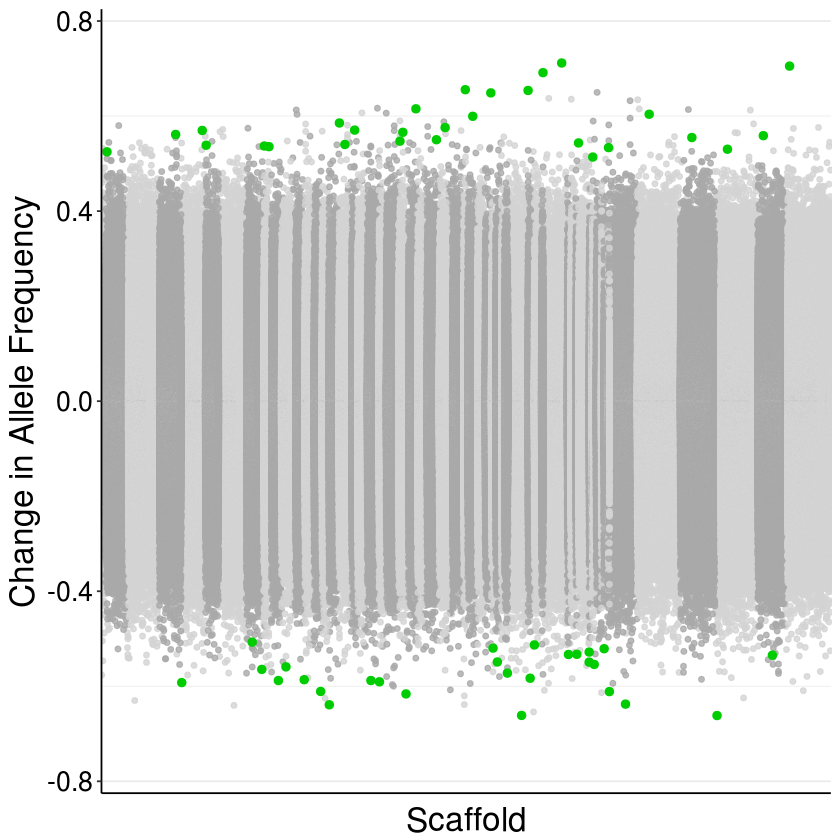

In [51]:
#plot without outliers
ggplot(allsnpshiscafsubout, aes(x=BPCum, y=P)) +
    geom_point( aes(color=as.factor(CHR)), alpha=0.8, size=1.3) +
    scale_color_manual(values = rep(c("lightgrey", "darkgrey"), 53 )) +
    geom_point(data=subset(allsnpshiscafsubout, SNP==1), color="green3", size=2) +    
    theme_bw() +
    xlab("Scaffold")+
    ylab("Change in Allele Frequency")+
    ylim(-.75, .75)+
    theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20)
    )

In [52]:
ggsave("/local/home/sarahgw/WGS/SNPS/All_mylu/plots/sigSNPsMafsout_nr.jpg", device="jpeg", h=8, w=8) 

In [61]:
write.csv(allsnpshi, file="~/WGS/SNPS/All_mylu/snps/njnyeu50AllsnpsMan.csv")

In [78]:
write.csv(allsnpshiscaf, file="~/WGS/SNPS/All_mylu/snps/njnyeu50SigsnpsMan.csv")

In [6]:
allsnpshiscaf=fread("~/WGS/SNPS/All_mylu/snps/njnyeu50SigsnpsMan.csv")

Read 12316782 rows and 6 (of 6) columns from 0.417 GB file in 00:00:27


In [ ]:
jpeg('~/WGS/SNPS/All_mylu/snps/NJNY_50_sigsnps.jpg')
manhattan(allsnpshiscaf, ylim=c(-1,1), logp=FALSE, highlight = ofinterest)
dev.off()

Now plot all pvalues with significant snps highleted

In [12]:
comPvaluesChrNJNY50_nr=read.csv("/data/sarahgw/WGS/SNPS/All_mylu/snps/NJNY50_comPvaluesNe424_296_nr.csv")
comPvaluesChrNJNY50out_nr=read.csv("/data/sarahgw/WGS/SNPS/All_mylu/snps/NJNY50out_comPvaluesNe424_296_nr.csv")

In [13]:
head(comPvaluesChrNJNY50out_nr)

X,Scaffold,SNP,Maj,Min,NJ,NY,NY_out,Comp
1,GL429770,8507307,A,C,9.99999e-07,1.899998e-05,9.999990e-07,2.863097e-11
2,GL429819,365354,G,A,9.99999e-07,7.899992e-05,9.999990e-07,2.863097e-11
3,GL429859,300331,T,C,9.99999e-07,9.999990e-07,9.999990e-07,2.863097e-11
4,GL429962,689293,A,C,9.99999e-07,9.999990e-07,9.999990e-07,2.863097e-11
5,GL430008,1396110,C,T,9.99999e-07,4.699995e-05,3.999996e-06,1.089787e-10
6,GL429885,2043530,T,C,9.99999e-07,1.599998e-05,4.999995e-06,1.351077e-10


In [14]:
nrow(comPvaluesChrNJNY50_nr)

[1] 321

In [15]:
allpvals=comPvaluesChrNJNY50_nr[,c("X", "Scaffold", "SNP", "Comp")]
colnames(allpvals)=c("CumBP","Scaf", "BP", "P")
allpvals$CHR=as.numeric(allpvals$Scaf)

In [16]:
allpvalsout=comPvaluesChrNJNY50out_nr[,c("X", "Scaffold", "SNP", "Comp")]
colnames(allpvalsout)=c("CumBP","Scaf", "BP", "P")
allpvalsout$CHR=as.numeric(allpvalsout$Scaf)

In [17]:
head(allpvalsout)

CumBP,Scaf,BP,P,CHR
1,GL429770,8507307,2.863097e-11,5
2,GL429819,365354,2.863097e-11,43
3,GL429859,300331,2.863097e-11,69
4,GL429962,689293,2.863097e-11,121
5,GL430008,1396110,1.089787e-10,132
6,GL429885,2043530,1.351077e-10,84


In [53]:
#allpvalssnp=merge(allpvals, SNPs, by=c("Scaf", "BP"), all.x=T)
allpvalssnpout=merge(allpvalsout, SNPsout, by=c("Scaf", "BP"), all.x=T)

In [54]:
head(allpvalssnpout)

Scaf,BP,CumBP,P,CHR,Comp,SNP
AAPE02069524,2581,287,1.054690e-02,1,NA,NA
AAPE02069524,2585,286,9.086787e-03,1,NA,NA
AAPE02069524,2586,272,5.751147e-03,1,NA,NA
GL429767,4380147,88,4.804710e-06,2,NA,NA
GL429767,16839644,58,7.511125e-07,2,7.511125e-07,1
GL429767,22649683,22,6.764905e-08,2,6.764905e-08,1


In [61]:
head(njnyeusnpAll)

V1,Scaffold,Position,V1.x,Major.x.x,Minor.x.x,Maf1_E.x,Maf2_E.x,Maf3_E.x,nInd_E.x,⋯,Maf3_E.y,nInd_E.y,Major.y.y,Minor.y.y,Maf1_U.y,Maf2_U.y,Maf3_U.y,nInd_U.y,diff.y,avdiffnjny
1,AAPE02055386,57060,1,T,C,0.000000,0.000005,0.000000,12,⋯,0.000000,11,T,C,0.000000,0.000005,0.000000,12,0.000001,-0.0162425
2,AAPE02055386,67758,2,C,T,0.067869,0.022733,0.037396,10,⋯,0.000000,10,C,T,0.043370,0.043371,0.061623,19,-0.043368,-0.0270405
3,AAPE02055386,67765,1,C,T,0.000000,0.000003,0.000000,11,⋯,0.000000,11,C,T,0.038368,0.037756,0.041336,19,-0.037752,-0.0188755
4,AAPE02055386,67766,2,G,A,0.062912,0.020990,0.038813,11,⋯,0.000000,10,G,A,0.037757,0.012754,0.040748,19,-0.012751,0.0041185
5,AAPE02055386,67785,3,G,A,0.000000,0.000002,0.000000,11,⋯,0.000000,11,G,A,0.000000,0.000002,0.000000,18,0.000002,-0.0168030
6,AAPE02055386,67795,3,C,T,0.255406,0.255405,0.262683,12,⋯,0.204537,11,C,T,0.273954,0.273961,0.232749,18,-0.068610,0.0470730


In [55]:
allpvalsmafsout=merge(njnyeusnpAll_nr, allpvalssnpout, by.x=c("Scaffold", "Position"), by.y=c("Scaf", "BP"))
#allpvalsmafs=merge(njnyeusnpAll, allpvalssnp, by.x=c("Scaffold", "Position"), by.y=c("Scaf", "BP"))

In [76]:
#allpvalssnp$BP=as.numeric(as.character(allpvalssnp$BP))
#allpvalssnp$P=as.numeric(as.character(allpvalssnp$P))
allpvalssnpout$BP=as.numeric(as.character(allpvalssnpout$BP))
allpvalssnpout$P=as.numeric(as.character(allpvalssnpout$P))

In [77]:
NROW(allpvalsmafsout)

[1] 321

In [79]:
#allpvalssnp$Scaf=NULL
allpvalssnpout$Scaf=NULL

In [80]:
neg=allpvalssnpout[allpvalssnpout$BP %in% allpvalsmafsout[allpvalsmafsout$diff.x<0,]$Position,]

In [81]:
NROW(neg)

[1] 168

In [82]:
head(njeusnpsAll[njeusnpsAll$diff<0,]$Position)

ERROR: Error in head(njeusnpsAll[njeusnpsAll$diff < 0, ]$Position): object 'njeusnpsAll' not found


In [83]:
pos=allpvalssnpout[allpvalssnpout$BP %in% allpvalsmafsout[allpvalsmafsout$diff.x>0,]$Position,]

starting and ending allele frequencies

In [84]:
allpvalssnpout_full=merge( allpvalssnpout, allpvalssnp,  by=c("CHR", "BP"), all=TRUE)

ERROR: Error in as.data.frame(y): object 'allpvalssnp' not found


In [95]:
head(allpvalssnpout_full)

CHR,BP,CumBP.x,P.x,SNP.x,CumBP.y,P.y,SNP.y
10,5007572,277,2.696359e-04,NA,277,2.696359e-04,NA
10,5086919,322,6.796866e-04,NA,322,6.796866e-04,NA
100,100454,230,8.328986e-05,NA,230,8.328986e-05,NA
100,3508435,36,5.120492e-08,1,36,5.120492e-08,2
101,639733,328,7.925125e-04,NA,328,7.925125e-04,NA
103,266596,74,4.032223e-07,NA,74,4.032223e-07,2


In [100]:
allpvalssnpout_full$test=1

In [96]:
NROW(subset(allpvalssnpout_full, SNP.x==1 & SNP.y==2))

[1] 52

In [98]:
length(unique(allpvalssnpout_full$CHR))

[1] 187

In [75]:
head(allpvalssnpout)

BP,CumBP,P,CHR,SNP
2581,398,4.215743e-03,2,NA
2585,371,2.245863e-03,2,NA
2586,345,1.140801e-03,2,NA
4380147,151,8.926870e-06,3,NA
16839644,70,2.904133e-07,3,1
22649683,20,1.459043e-08,3,1


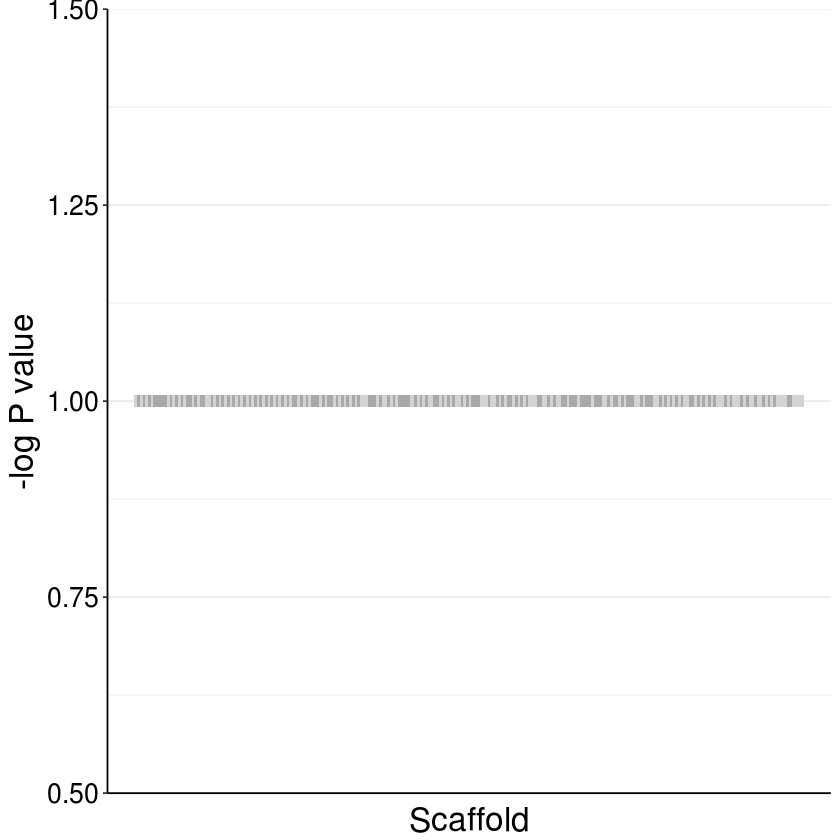

In [101]:
ggplot(data=allpvalssnpout_full, aes(x=CHR,y=test)) +
    geom_point(aes(color=as.factor(CHR)), size=3, shape=15) + 
 scale_color_manual(values = rep(c("lightgrey", "darkgrey"), 187 ))+
    theme_bw() +
xlab("Scaffold")+
    ylab("-log P value")+
theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20) 
)

In [102]:
ggsave("/local/home/sarahgw/WGS/SNPS/All_mylu/plots/sigSNPsbothPvals_scafs_nr.pdf", h=2, w=10) 

In [105]:
head(allpvalssnpout_full)

CHR,BP,CumBP.x,P.x,SNP.x,CumBP.y,P.y,SNP.y,test
10,5007572,277,2.696359e-04,NA,277,2.696359e-04,NA,1
10,5086919,322,6.796866e-04,NA,322,6.796866e-04,NA,1
100,100454,230,8.328986e-05,NA,230,8.328986e-05,NA,1
100,3508435,36,5.120492e-08,1,36,5.120492e-08,2,1
101,639733,328,7.925125e-04,NA,328,7.925125e-04,NA,1
103,266596,74,4.032223e-07,NA,74,4.032223e-07,2,1


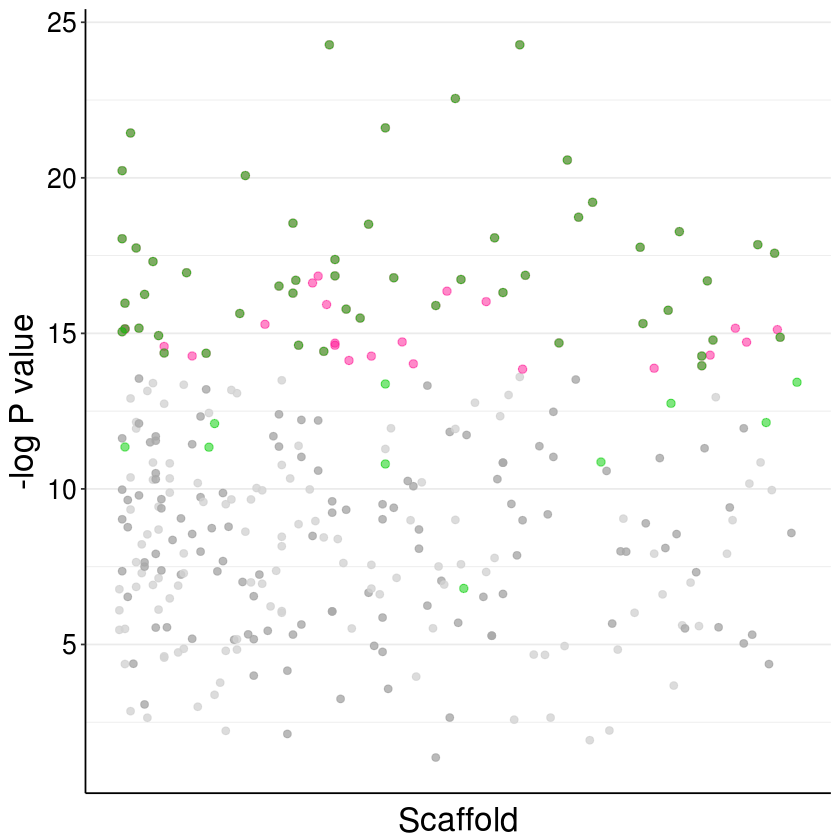

In [109]:
ggplot(data=subset(allpvalssnpout_full, is.na(SNP.x) & is.na(SNP.y)), aes(x=CHR, y=-log(P.x))) +
    geom_point(aes(color=as.factor(CHR)), alpha=0.8, size=1.8) +
 scale_color_manual(values = rep(c("lightgrey", "darkgrey"), 187 ))+
   geom_point(data=subset(allpvalssnpout_full, SNP.y==2), alpha=0.5, color="deeppink", size=2) +    
   geom_point(data=subset(allpvalssnpout_full, SNP.x==1), alpha=0.5, color="green3", size=2) +    
    theme_bw() +
xlab("Scaffold")+
    ylab("-log P value")+
theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20) 

     )

In [110]:
ggsave("/local/home/sarahgw/WGS/SNPS/All_mylu/plots/sigSNPsbothPvals_nr.pdf", h=8, w=8) 

In [80]:
neg$test=1 

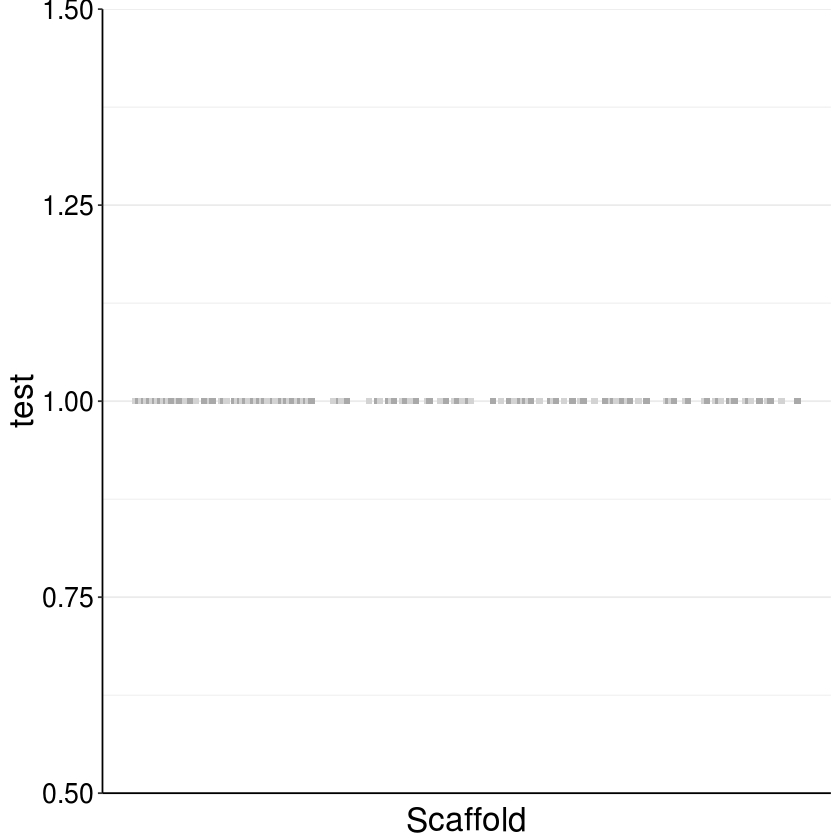

In [84]:
ggplot(neg, aes(x=CHR, y=test)) +
    geom_point(aes(color=as.factor(CHR)), shape=15) + 
 scale_color_manual(values = rep(c("lightgrey", "darkgrey"), 244 ))+   
    theme_bw() +
xlab("Scaffold")+
    
theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20) 
     )

In [85]:
ggsave("/local/home/sarahgw/WGS/SNPS/All_mylu/plots/sigSNPsoutPvalsNeg_scaf_nr.pdf", h=2, w=10) 

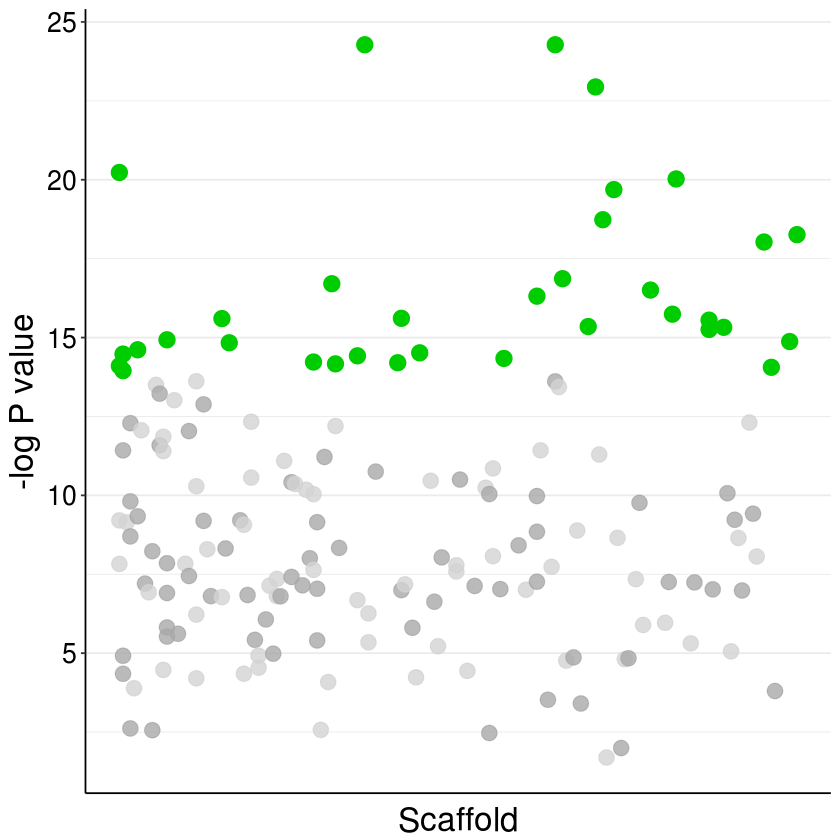

In [67]:
ggplot(neg, aes(x=CHR, y=-log(P))) +
    geom_point(aes(color=as.factor(CHR)), alpha=0.8, size=4) +
 scale_color_manual(values = rep(c("lightgrey", "darkgrey"), 244 ))+
   geom_point(data=subset(neg, SNP==1), color="green3", size=4.2) +    
    theme_bw() +
xlab("Scaffold")+
    ylab("-log P value")+
theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20) 
     )

In [68]:
ggsave("/data/sarahgw/WGS/SNPS/All_mylu/plots/sigSNPsoutPvalsNeg_nr.pdf", h=8, w=8) 

In [81]:
pos$test=1

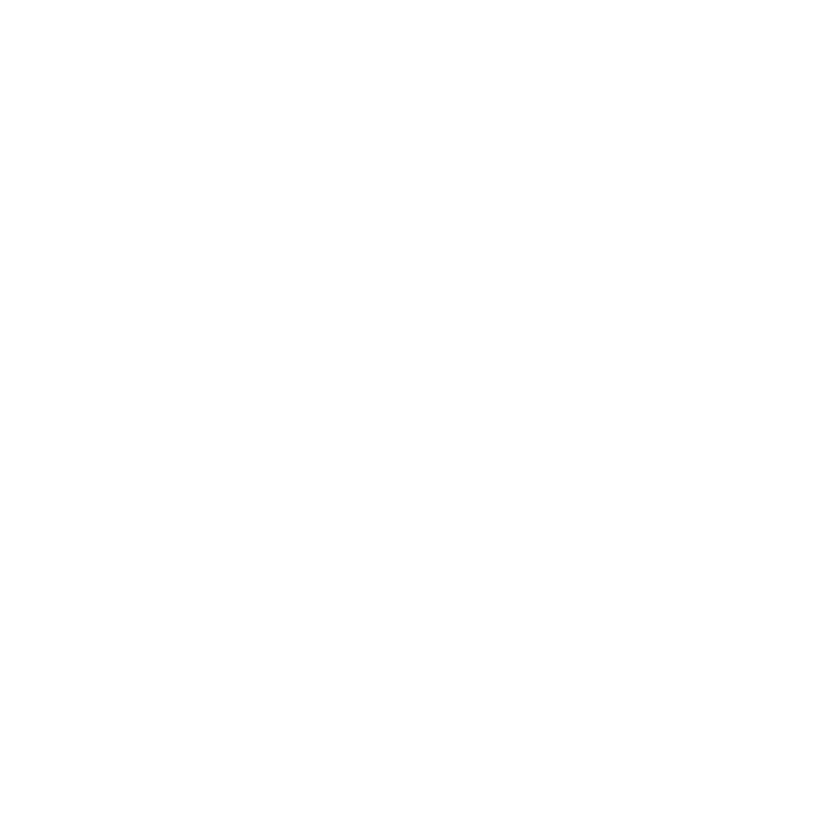

In [62]:
ggplot(pos, aes(x=CHR, y=test)) +
    geom_point(aes(color=as.factor(CHR)), alpha=0.8, size=1.8, shape=15) + 
 scale_color_manual(values = rep(c("lightgrey", "darkgrey"), 244 ))+
    theme_bw() +
xlab("Scaffold")+
    ylab("-log P value")+
theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20) 
     )

In [83]:
ggsave("/local/home/sarahgw/WGS/SNPS/All_mylu/plots/sigSNPsoutPvalsPos_scaf_nr.pdf", h=2, w=10) 

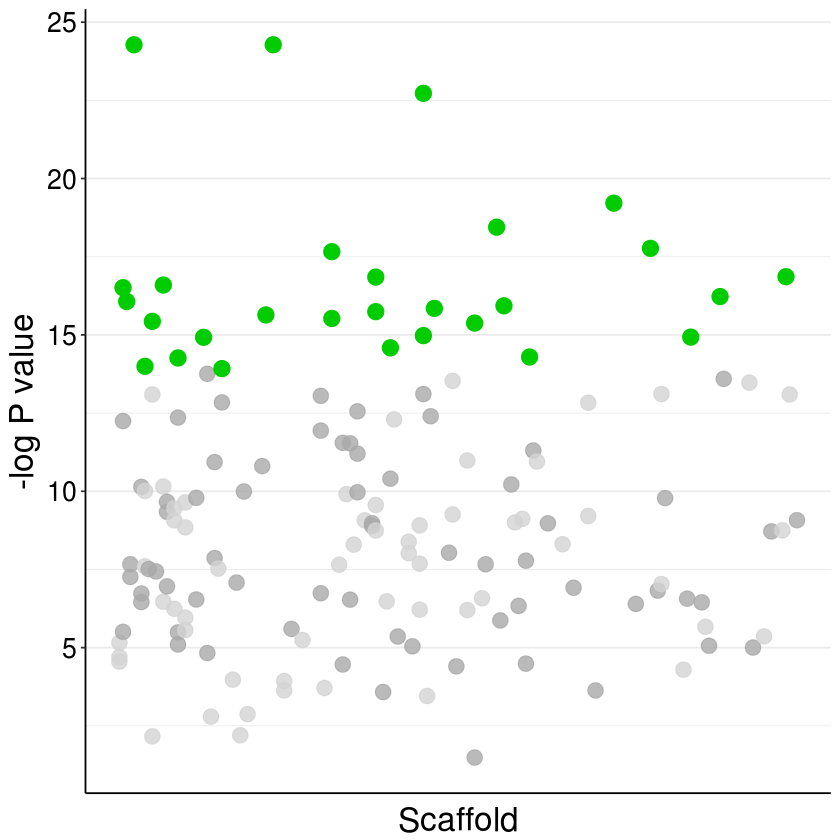

In [65]:
ggplot(pos, aes(x=CHR, y=-log(P))) +
    geom_point(aes(color=as.factor(CHR)), alpha=0.8, size=4) +
 scale_color_manual(values = rep(c("lightgrey", "darkgrey"), 244 ))+
   geom_point(data=subset(pos, SNP==1), color="green3", size=4.2) +    
    theme_bw() +
xlab("Scaffold")+
    ylab("-log P value")+
theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20) 
     )

In [66]:
ggsave("/data/sarahgw/WGS/SNPS/All_mylu/plots/sigSNPsoutPvalsPos_nr.pdf", h=8, w=8) 

In [30]:
allpvalssnpout=allpvalssnpout[order(allpvalssnpout$P),] 

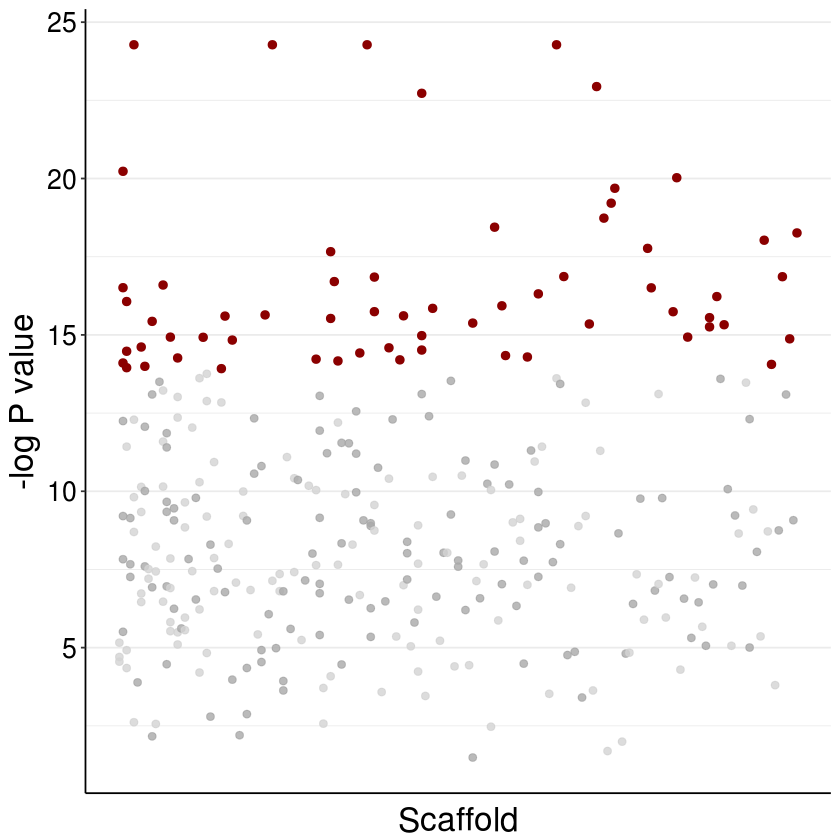

In [46]:
ggplot(allpvalssnpout, aes(x=CHR, y=-log(P))) +
    geom_point(aes(color=as.factor(CHR)), alpha=0.8, size=1.8) +
 scale_color_manual(values = rep(c("lightgrey", "darkgrey"), 244 ))+
   geom_point(data=subset(allpvalssnpout, SNP==1), color="darkred", size=2) +    
    theme_bw() +
xlab("Scaffold")+
    ylab("-log P value")+
theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20) 
     )

In [50]:
ggsave("/local/home/sarahgw/WGS/SNPS/All_mylu/plots/sigSNPsPvals.pdf", h=8, w=8) 

## plot s values

In [35]:
meansNJ=read.csv("/data/sarahgw/WGS/SNPS/All_mylu/snps/svalues_NJ.csv", row.names=1)

In [36]:
meansNY=read.csv("/data/sarahgw/WGS/SNPS/All_mylu/snps/svalues_NY.csv", row.names=1)

In [37]:
colnames(meansNJ)=c("mean_NJ", "lower_NJ", "upper_NJ", "SNP")
colnames(meansNY)=c("mean_NY", "lower_NY", "upper_NY", "SNP")
head(meansNJ)

mean_NJ,lower_NJ,upper_NJ,SNP
0.02805264,-0.9559363,0.9492035,11932
0.73521267,0.1984769,0.9903049,1241213
-0.94323281,-0.9989299,-0.7981145,1396110
-0.91313355,-0.9969916,-0.6797850,1484586
-0.92927846,-0.9991487,-0.7431681,14993622
0.77302043,0.3359123,0.9911247,1661413


In [63]:
meansAll=merge(meansNJ, meansNY, by="SNP")
head(meansAll)

SNP,mean_NJ,lower_NJ,upper_NJ,mean_NY,lower_NY,upper_NY
965,-0.91431561,-0.9980282,-0.6768604,-0.9508529,-0.9988991,-0.8230342
9663,-0.69865933,-0.9927223,0.1604964,-0.9094120,-0.9983324,-0.5748621
11932,0.02805264,-0.9559363,0.9492035,0.7221125,0.2147785,0.9852293
60325,-0.93372382,-0.9988213,-0.7422904,-0.8971644,-0.9974173,-0.5831152
60326,-0.94484787,-0.9989856,-0.7826469,-0.8519792,-0.9981024,-0.3730246
91034,0.02993932,-0.9422448,0.9641850,0.6987865,0.2010760,0.9905291


In [66]:
meansAll=pivot_longer(meansAll,
  cols = 2:7,
  names_to = c( "site"),
  names_pattern = "_(.*)",
  values_to = c("mean", "lower", "upper")
)

In [67]:
head(meansAll)

SNP,site,mean,lower,upper
965,NJ,-0.91431561,-0.9980282,-0.6768604
965,NY,-0.95085288,-0.9988991,-0.8230342
9663,NJ,-0.69865933,-0.9927223,0.1604964
9663,NY,-0.90941202,-0.9983324,-0.5748621
11932,NJ,0.02805264,-0.9559363,0.9492035
11932,NY,0.72211248,0.2147785,0.9852293


In [85]:
negs=meansAll[meansAll$SNP %in% allpvalsmafsout[allpvalsmafsout$diff.x<0,]$Position,]

In [86]:
poss=meansAll[meansAll$SNP %in% allpvalsmafsout[allpvalsmafsout$diff.x>0,]$Position,]

In [103]:
negs=merge(negs, neg[c(1,2)], by.x="SNP", by.y="BP")

In [105]:
poss=merge(poss, pos[c(1,2)], by.x="SNP", by.y="BP")

In [106]:
head(poss)

SNP,site,mean,lower,upper,CumBP
11932,NJ,0.02805264,-0.95593625,0.9492035,42
11932,NY,0.72211248,0.21477849,0.9852293,42
91034,NJ,0.02993932,-0.94224478,0.9641850,18
91034,NY,0.69878649,0.20107595,0.9905291,18
293372,NJ,0.75458646,0.34893566,0.9890078,19
293372,NY,0.59130558,-0.06117532,0.9878908,19


In [113]:
tail(negs)

,SNP,site,mean,lower,upper,CumBP
63,965,NJ,-0.9143156,-0.9980282,-0.6768604,13
64,965,NY,-0.9508529,-0.9988991,-0.8230342,13
65,9663,NJ,-0.6986593,-0.9927223,0.1604964,45
66,9663,NY,-0.9094120,-0.9983324,-0.5748621,45
67,99324,NJ,-0.8044927,-0.9967657,-0.1644291,38
68,99324,NY,-0.9671617,-0.9987467,-0.8778116,38


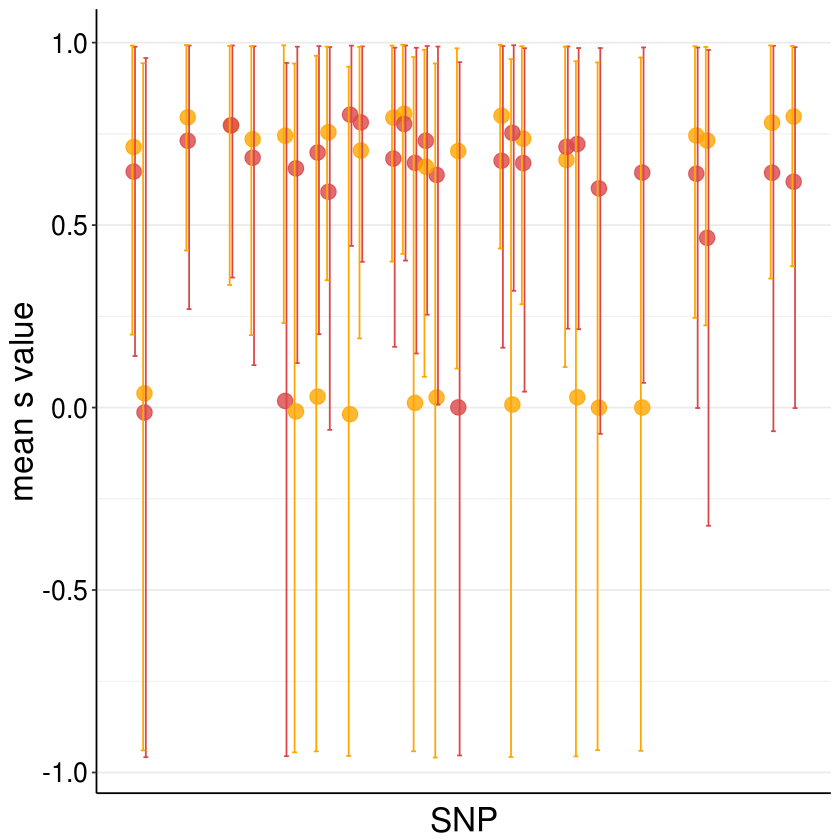

In [122]:
ggplot(poss, aes(x=CumBP, y=mean)) +
    geom_point(aes(color=site), alpha=0.8, size=4) +
 scale_color_manual(values = rep(c("#ffa600", "#da4749"), 244 ))+
    theme_bw() +
xlab("SNP")+
    ylab("mean s value")+
geom_errorbar(aes(ymin=lower, ymax=upper, color=site),
                 position=position_dodge(width=0.5))+ 
theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20) 
     )

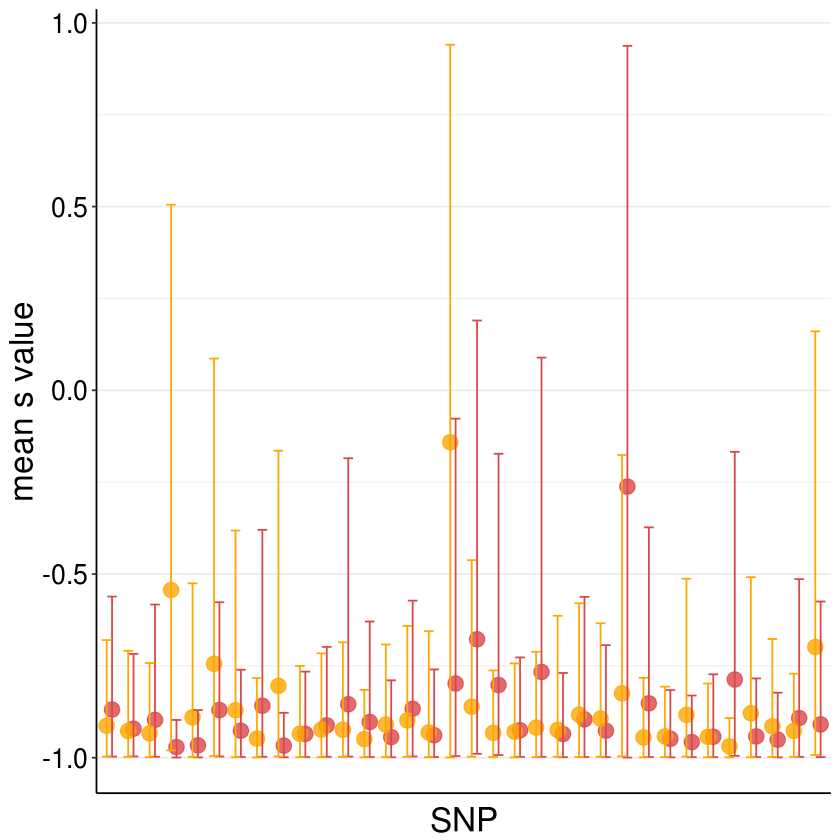

In [121]:
ggplot(negs, aes(x=SNP, y=mean)) +
    geom_point(aes(color=site), alpha=0.8, size=4, position=position_dodge(width=0.5)) +
 scale_color_manual(values = rep(c("#ffa600", "#da4749"), 244 ))+
    theme_bw() +
xlab("SNP")+
    ylab("mean s value")+
geom_errorbar(aes(ymin=lower, ymax=upper, color=site),
                 position=position_dodge(width=0.5))+ 
theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20) 
     )

Need to think about this, how can we denote samples where VT isn't that different from NJ and NY? 

Then, another figure is just the ones that have genes showing the location of the gene on the scaffold and the location of the snp. 

## To do next
Ok, so we need to see basically if htere are snps that are similar in frequency in all three exposed pops. Can also look for snps that change in same direction for Vt Somehow plot not just change but starting and ending.

Also need to look at the other ways of calculating maf. are they different? 

You also need to move everything around, this should go before the graphs of f1f2. 

In [78]:
(cbind.data.frame(mafsNJNY50SigVT$NewScaf, mafsNJNY50SigVT$Position, mafsNJNY50SigVT$Maf2_E.NJ, mafsNJNY50SigVT$Maf2_E.NY, mafsNJNY50SigVT$Maf2_E.VT))

mafsNJNY50SigVT$NewScaf,mafsNJNY50SigVT$Position,mafsNJNY50SigVT$Maf2_E.NJ,mafsNJNY50SigVT$Maf2_E.NY,mafsNJNY50SigVT$Maf2_E.VT
NW_005871048.1,16839644,0.047404,0.220040,0.443786
NW_005871048.1,22649683,0.536439,0.860214,0.469789
NW_005871048.1,38456248,0.714099,0.533534,0.491917
NW_005871048.1,46534125,0.140358,0.000002,0.466402
NW_005871048.1,51542832,0.712276,0.729271,0.574318
NW_005871049.1,29962249,0.659926,0.636289,0.216655
NW_005871049.1,34577793,0.285658,0.183168,0.472265
NW_005871049.1,3921142,0.241860,0.062879,0.409229
NW_005871051.1,8292792,0.279313,0.043146,0.264547
NW_005871051.1,8507307,0.726628,0.778908,0.364360


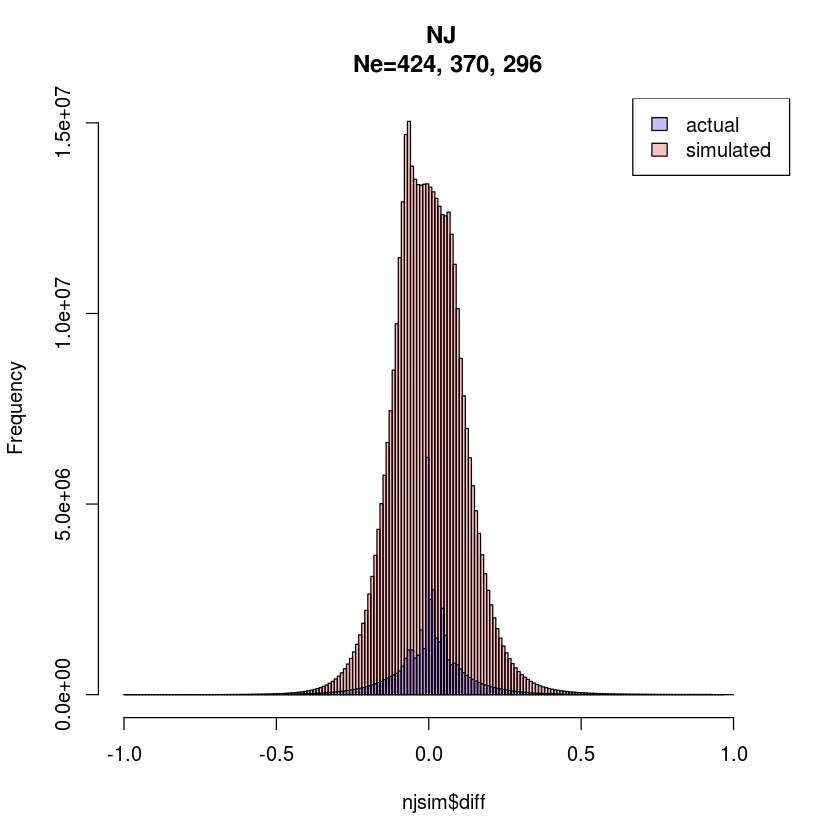

In [16]:
a=hist(njeusnpsAll$diff, plot=F, breaks=200)
s=hist(njsim$diff, plot=F, breaks=200)
    plot( s, col=rgb(1,0,0,1/4), xlim=c(-1,1.1), main=c("NJ \n Ne=424, 370, 296") ) 
    plot( a, col=rgb(0,0,1,1/4), add=T)
    legend("topright", c("actual", "simulated"), fill=c(col=rgb(0,0,1,1/4), col=rgb(1,0,0,1/4) ))

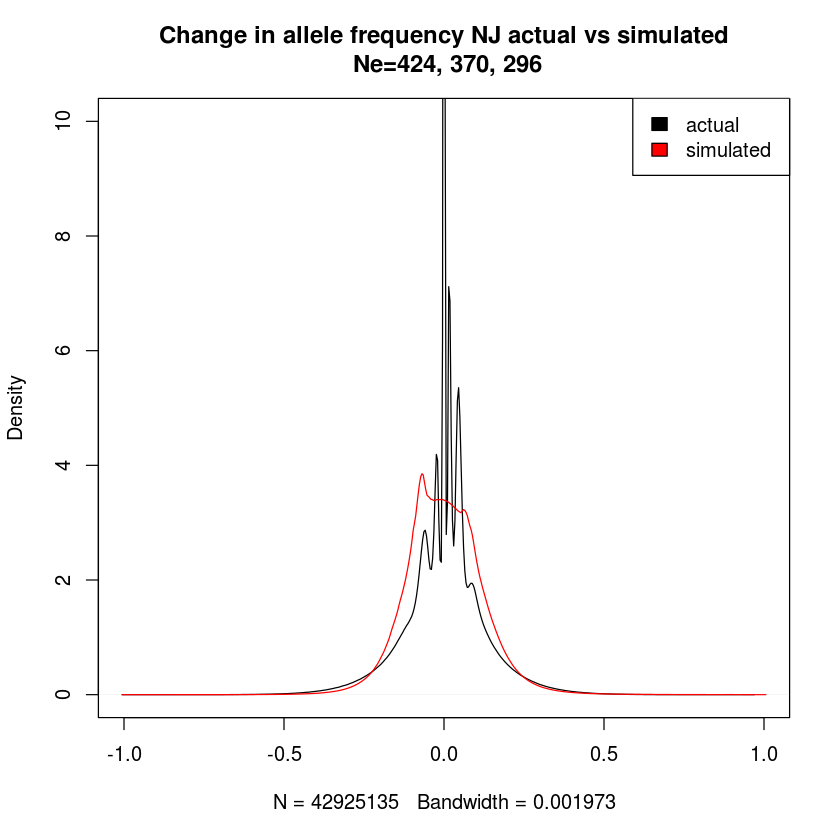

In [12]:
plot(density(njeusnpsAll$diff), main=" Change in allele frequency NJ actual vs simulated \n Ne=424, 370, 296", xlim=c(-1,1), ylim=c(0, 10))
    lines(density(njsim$diff, na.rm=TRUE), col="red") 
legend("topright", c("actual", "simulated"), fill=c("black", "red"))

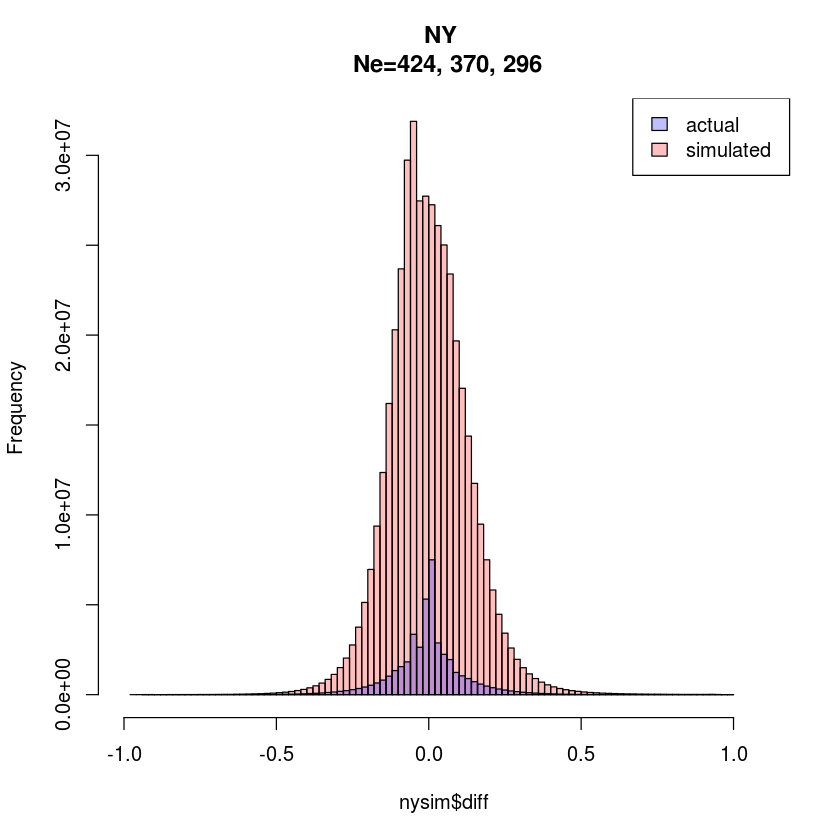

In [13]:
a=hist(nyeusnpsAll$diff, plot=F, breaks=100)
s=hist(nysim$diff, plot=F, breaks=100)
    plot( s, col=rgb(1,0,0,1/4), xlim=c(-1,1.1), main=c("NY \n Ne=424, 370, 296") ) 
    plot( a, col=rgb(0,0,1,1/4), add=T)
    legend("topright", c("actual", "simulated"), fill=c(col=rgb(0,0,1,1/4), col=rgb(1,0,0,1/4) ))

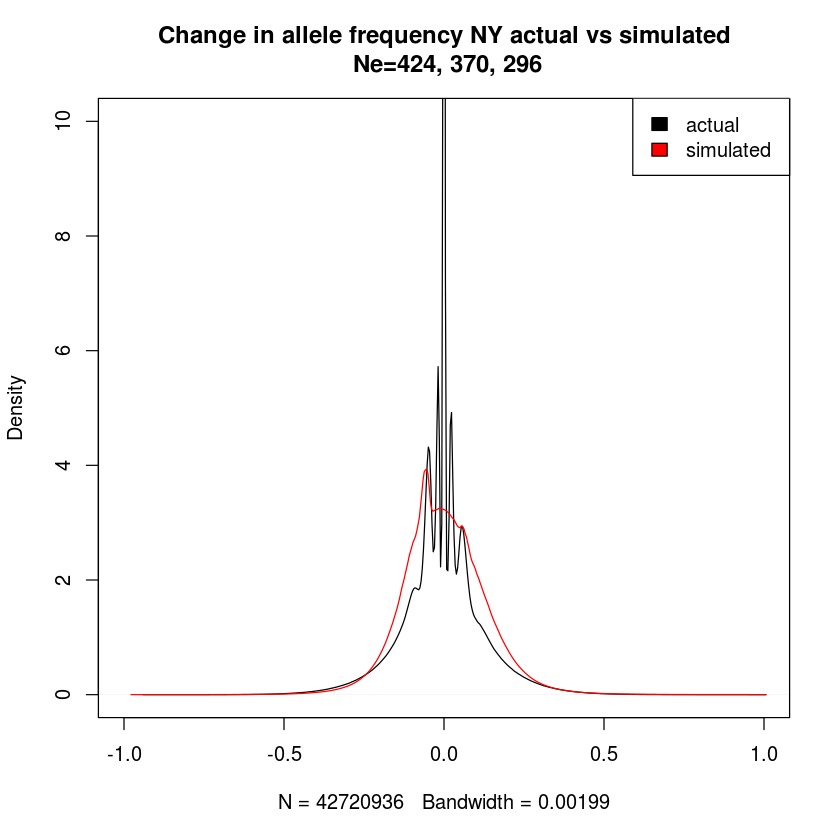

In [14]:
plot(density(nyeusnpsAll$diff), main=" Change in allele frequency NY actual vs simulated \n Ne=424, 370, 296", xlim=c(-1,1), ylim=c(0, 10))
    lines(density(nysim$diff, na.rm=TRUE), col="red") 
legend("topright", c("actual", "simulated"), fill=c("black", "red"))

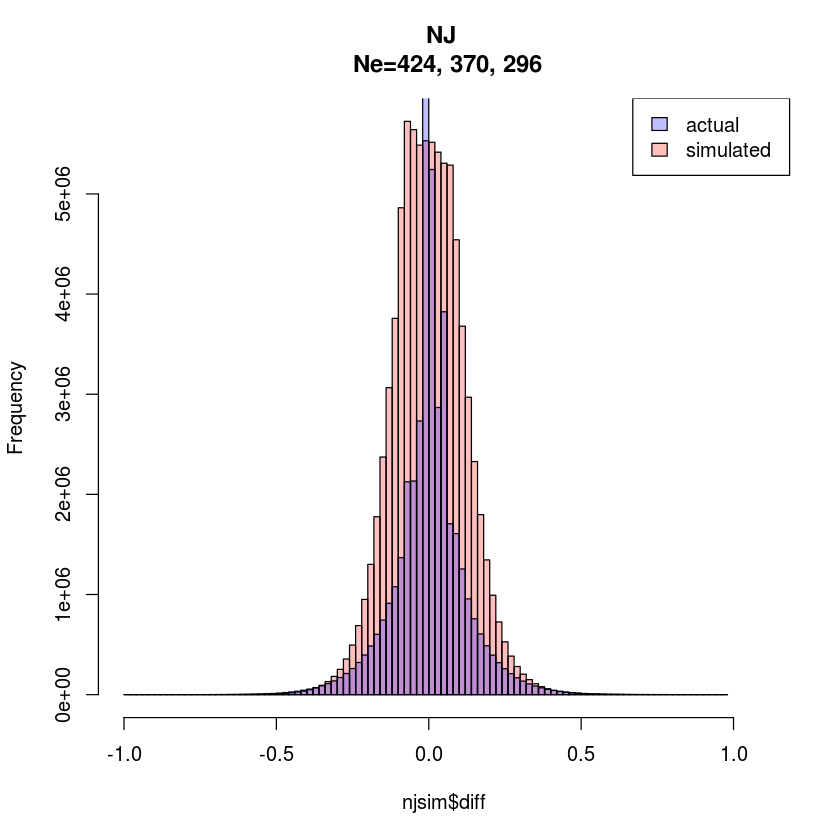

In [17]:
a=hist(njeusnpsAll$diff, plot=F, breaks=100)
s=hist(njsim$diff, plot=F, breaks=100)
    plot( s, col=rgb(1,0,0,1/4), xlim=c(-1,1.1), main=c("NJ \n Ne=424, 370, 296") ) 
    plot( a, col=rgb(0,0,1,1/4), add=T)
    legend("topright", c("actual", "simulated"), fill=c(col=rgb(0,0,1,1/4), col=rgb(1,0,0,1/4) ))

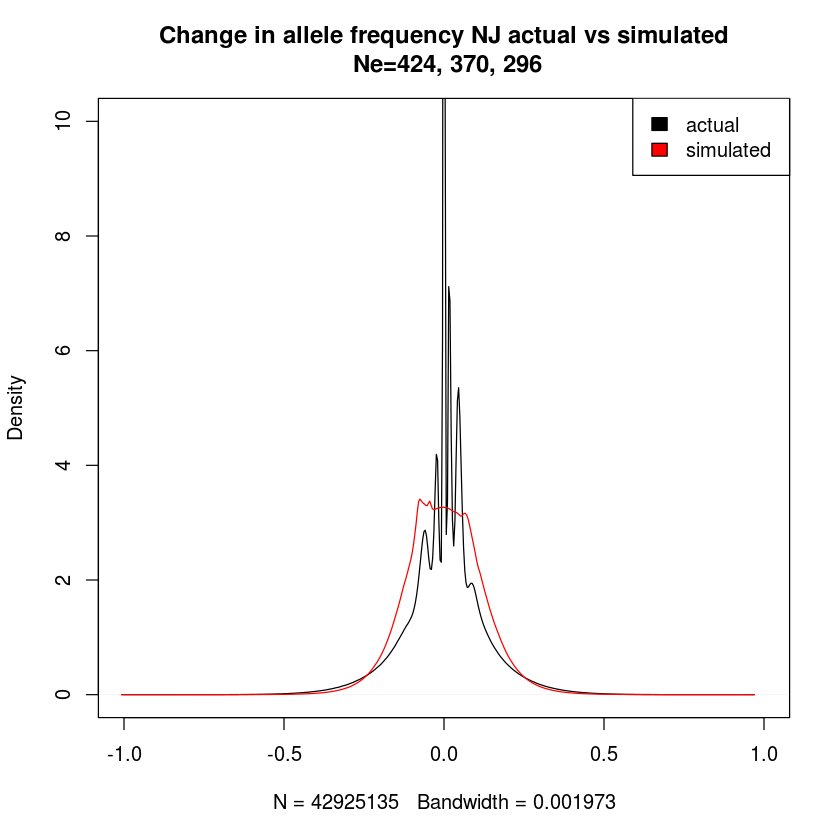

In [14]:
plot(density(njeusnpsAll$diff), main=" Change in allele frequency NJ actual vs simulated \n Ne=424, 370, 296", xlim=c(-1,1), ylim=c(0, 10))
    lines(density(njsimNA$diff), col="red") 
legend("topright", c("actual", "simulated"), fill=c("black", "red"))

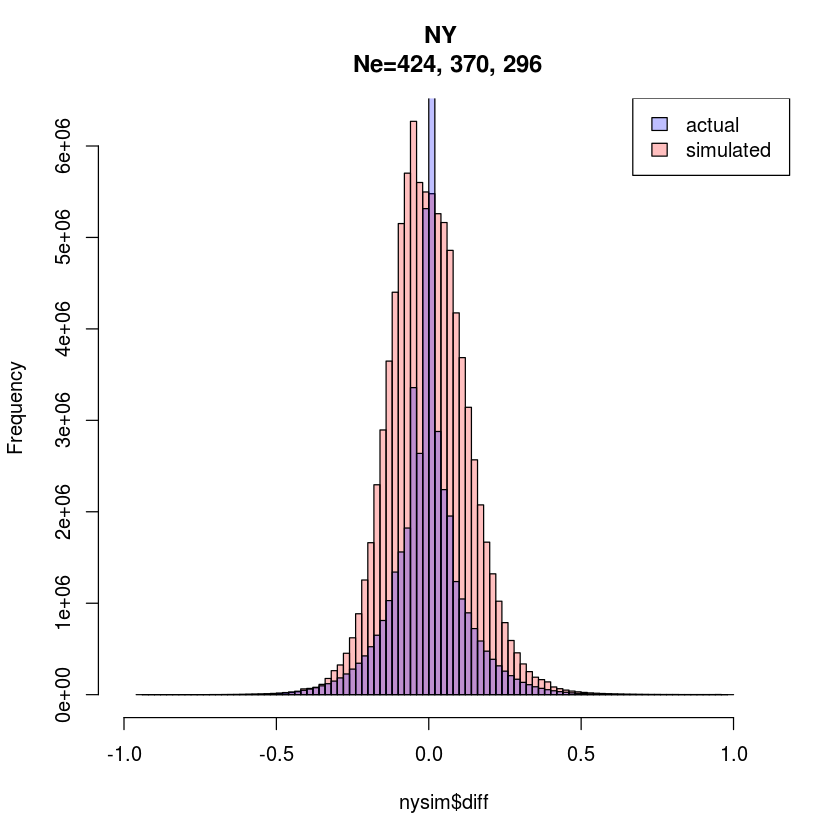

In [15]:
a=hist(nyeusnpsAll$diff, plot=F, breaks=100)
s=hist(nysim$diff, plot=F, breaks=100)
    plot( s, col=rgb(1,0,0,1/4), xlim=c(-1,1.1), main=c("NY \n Ne=424, 370, 296") ) 
    plot( a, col=rgb(0,0,1,1/4), add=T)
    legend("topright", c("actual", "simulated"), fill=c(col=rgb(0,0,1,1/4), col=rgb(1,0,0,1/4) ))

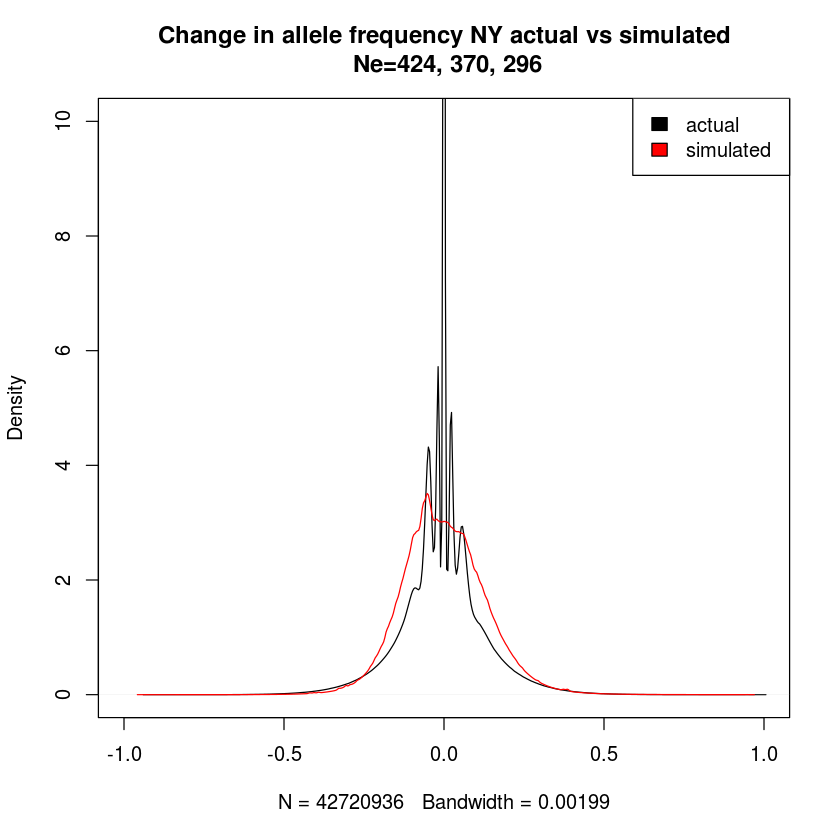

In [7]:
plot(density(nyeusnpsAll$diff), main=" Change in allele frequency NY actual vs simulated \n Ne=424, 370, 296", xlim=c(-1,1), ylim=c(0, 10))
    lines(density(nysim$diff, na.rm=TRUE), col="red") 
legend("topright", c("actual", "simulated"), fill=c("black", "red"))

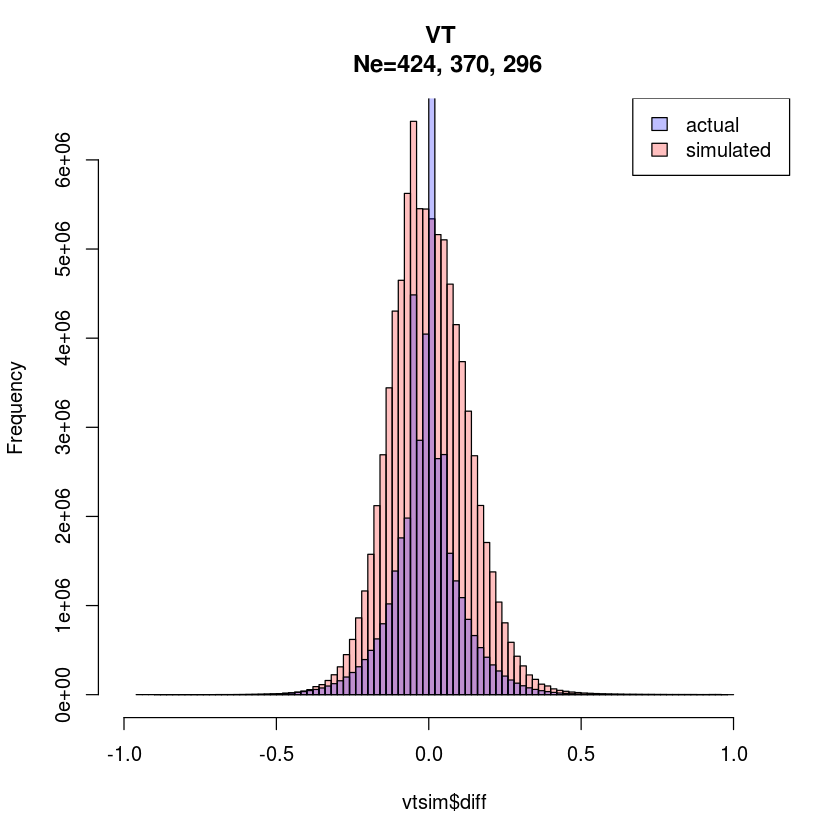

In [14]:
a=hist(vteusnpsAll$diff, plot=F, breaks=100)
s=hist(vtsim$diff, plot=F, breaks=100)
    plot( s, col=rgb(1,0,0,1/4), xlim=c(-1,1.1), main=c("VT \n Ne=424, 370, 296") ) 
    plot( a, col=rgb(0,0,1,1/4), add=T)
    legend("topright", c("actual", "simulated"), fill=c(col=rgb(0,0,1,1/4), col=rgb(1,0,0,1/4) ))

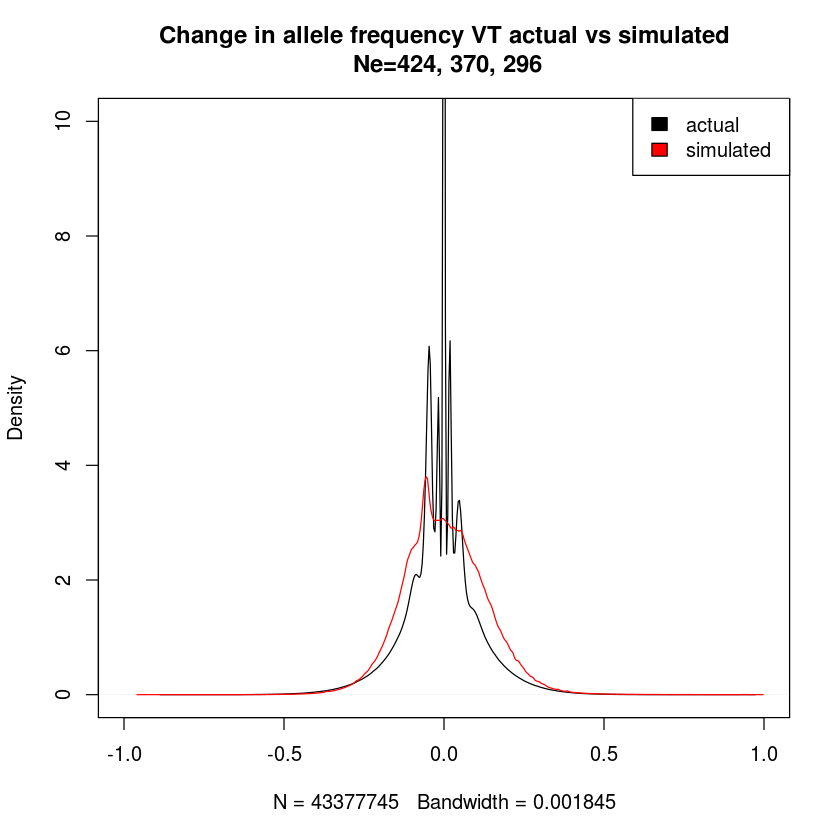

In [18]:
plot(density(vteusnpsAll$diff), main=" Change in allele frequency VT actual vs simulated \n Ne=424, 370, 296", xlim=c(-1,1), ylim=c(0, 10))
    lines(density(vtsim$diff, na.rm=TRUE), col="red") 
legend("topright", c("actual", "simulated"), fill=c("black", "red"))

## Plot change in allele frequency for significant snps

In [59]:
sigSNPS=read.csv("~/WGS/SNPS/All_mylu/snps/NJNYVT40_margCompvaluesNe354.csv", row.names=1)

In [97]:
VTSigS=vteusnpsAll[vteusnpsAll$Scaffold %in% sigSNPS$Scaffold,]
NJSigS=njeusnpsAll[njeusnpsAll$Scaffold %in% sigSNPS$Scaffold,]
NYSigS=nyeusnpsAll[nyeusnpsAll$Scaffold %in% sigSNPS$Scaffold,]

In [98]:
NJNYSigS=merge(NJSigS, NYSigS, by=c("Scaffold", "Position"))

In [99]:
NJNYVTSigS=merge(NJNYSigS, VTSigS, by=c("Scaffold", "Position"))

In [100]:
NJNYVTSigS$diffav=rowMeans(cbind(NJNYVTSigS$diff, NJNYVTSigS$diff.x, NJNYVTSigS$diff.y))

In [101]:
head(NJNYVTSigS$diff)
head(NJNYVTSigS$diff.x)
head(NJNYVTSigS$diff.y)
head(NJNYVTSigS$diffav)

[1] -0.050623 -0.052297  0.003936  0.055307 -0.156307 -0.093754

[1]  0.109715  0.090624 -0.055527 -0.111671  0.039427  0.097373

[1]  0.021936 -0.161271  0.048482 -0.023689  0.000312 -0.028052

[1]  0.027009333 -0.040981333 -0.001036333 -0.026684333 -0.038856000
[6] -0.008144333

In [81]:
(0.003936+ -0.055527+ 0.048482)/3

[1] -0.001036333

In [141]:
sigSNPSsimp=sigSNPS[-c(1, 11),]
sigSNPSsimp2=sigSNPS[-c(2, 11),]

In [115]:
NJNYVTSig=merge(NJNYVTSigS, sigSNPSsimp, by="Scaffold")

In [142]:
NJNYVTSig2=merge(NJNYVTSigS, sigSNPSsimp2, by="Scaffold")

In [116]:
NJNYVTSig$RelPos=NJNYVTSig$Position-NJNYVTSig$SNP

In [143]:
NJNYVTSig2$RelPos=NJNYVTSig2$Position-NJNYVTSig2$SNP

In [117]:
Scaffolds=sigSNPSsimp$Scaffold
Scaffolds

[1] GL429767 GL429769 GL429778 GL429785 GL429813 GL429834 GL429848 GL429849
 [9] GL429852 GL429872 GL429882 GL429966
12 Levels: GL429767 GL429769 GL429778 GL429785 GL429813 GL429834 ... GL429966

In [119]:
NJNYVTSig[NJNYVTSig$Scaffold==Scaffolds[2] & NJNYVTSig$RelPos==0,]

Scaffold,Position,V1.x,Major.x.x,Minor.x.x,Maf1_E.x,Maf2_E.x,Maf3_E.x,nInd_E.x,Major.y.x,⋯,diffav,NewScaf,SNP,Maj,Min,NJ,NY,VT,Comp,RelPos
GL429769,6378055,1499037,A,G,0.589184,0.589182,0.5835,12,A,⋯,0.5139537,NW_005871050.1,6378055,A,G,9.99999e-07,0.008175992,0.0001809998,5.907905e-10,0


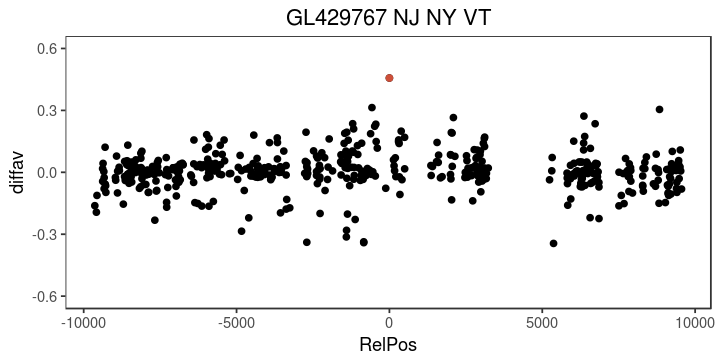

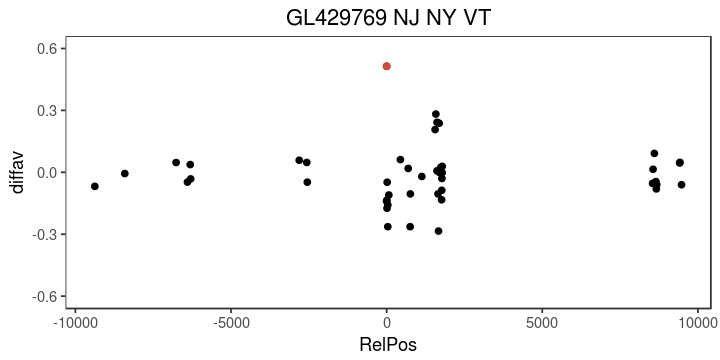

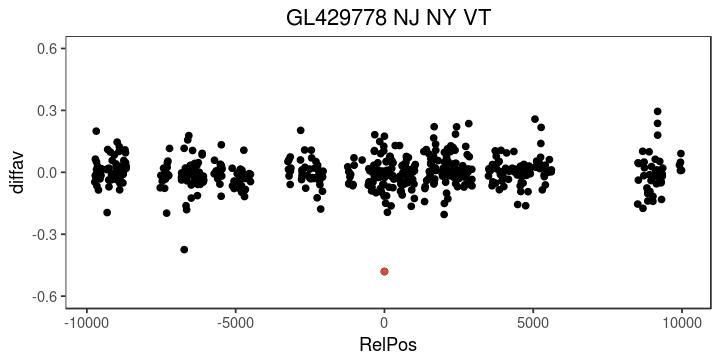

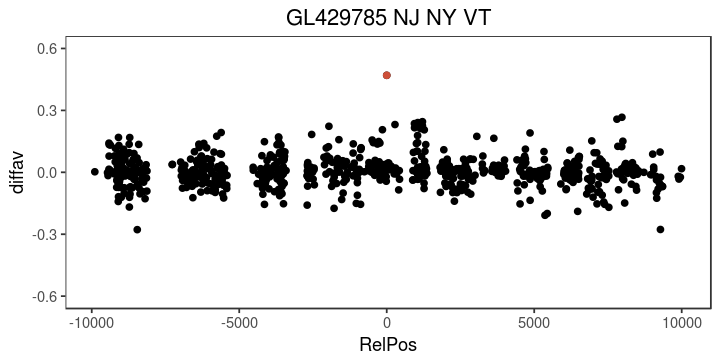

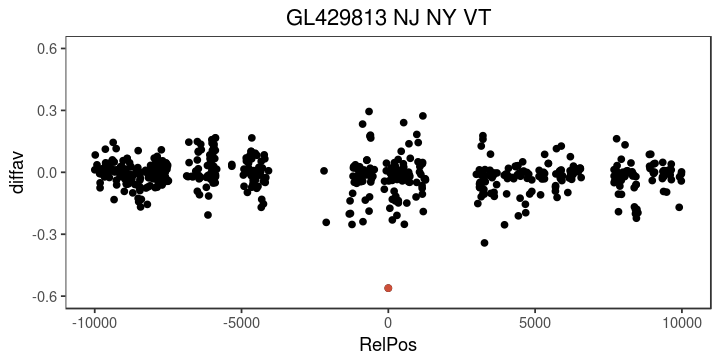

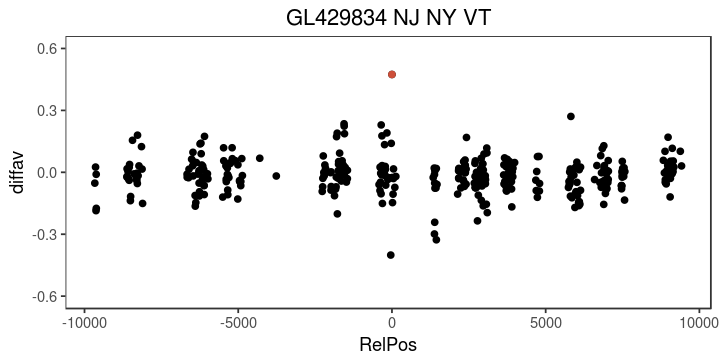

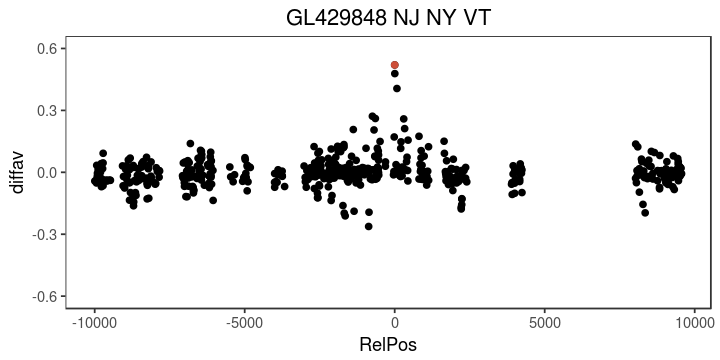

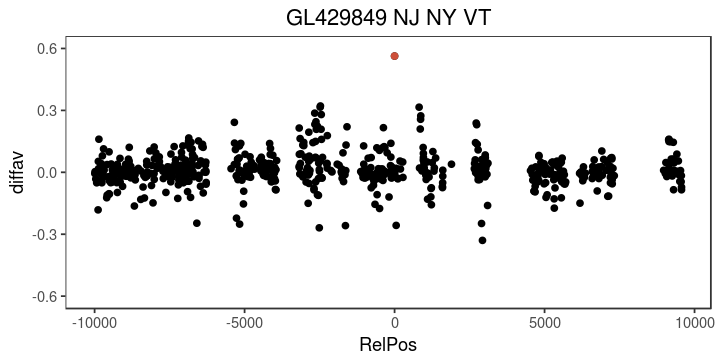

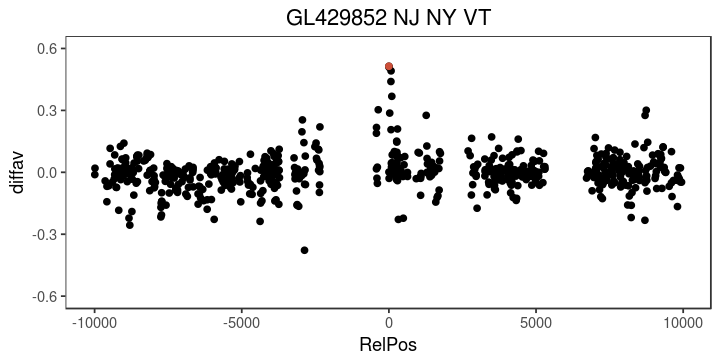

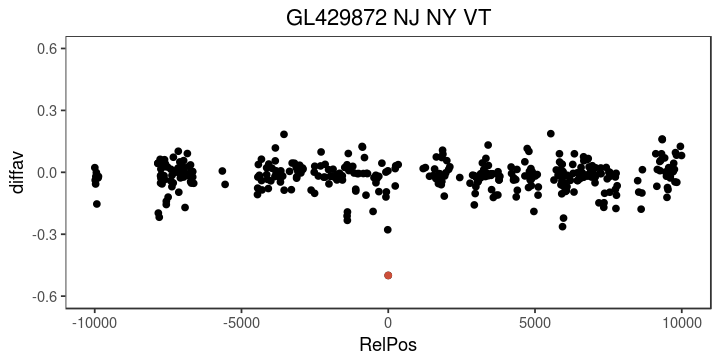

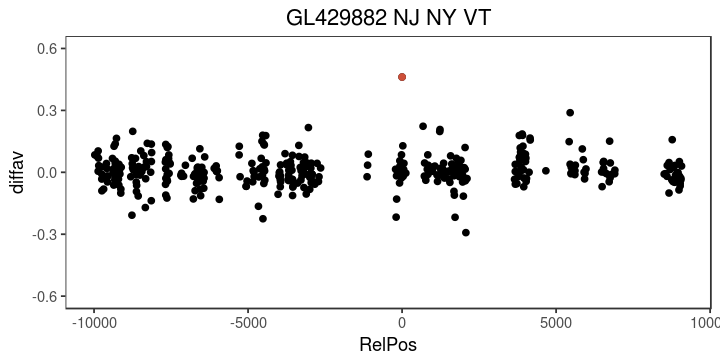

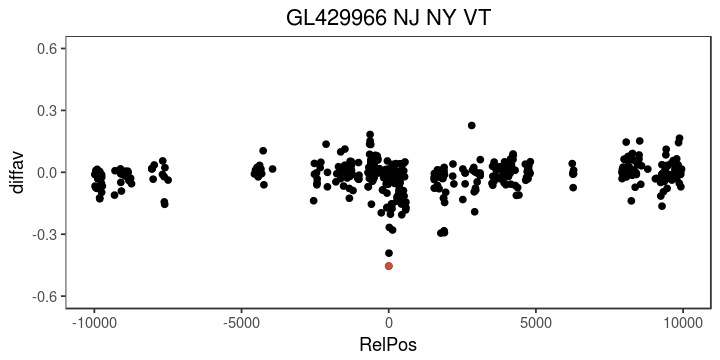

In [129]:
options(repr.plot.width=6, repr.plot.height=3)
for (i in 1:length(Scaffolds)){
all=NJNYVTSig[NJNYVTSig$Scaffold==Scaffolds[i] & NJNYVTSig$RelPos<10000 & NJNYVTSig$RelPos>(-10000),] 
snp=all[all$RelPos==0,] 
    print(ggplot()+ geom_point(data=all, aes(x=RelPos, y=diffav))+ theme_bw()
    + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank())+ ggtitle(paste0(Scaffolds[i]," NJ NY VT"))+theme(plot.title = element_text(hjust = 0.5))
    + geom_point(data=snp, aes(x=RelPos, y=diffav), colour="tomato3")
     + ylim(-0.6, 0.6))
}

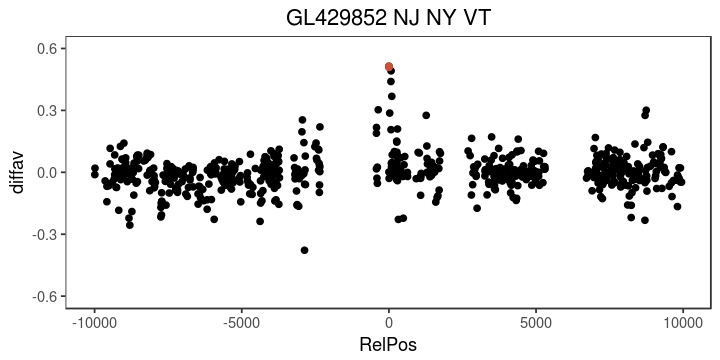

In [144]:
all=NJNYVTSig[NJNYVTSig$Scaffold==Scaffolds[9] & NJNYVTSig$RelPos<10000 & NJNYVTSig$RelPos>(-10000),] 
snp=all[all$RelPos==0|all$RelPos==8,] 
    print(ggplot()+ geom_point(data=all, aes(x=RelPos, y=diffav))+ theme_bw()
    + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank())+ ggtitle(paste0(Scaffolds[9]," NJ NY VT"))+theme(plot.title = element_text(hjust = 0.5))
    + geom_point(data=snp, aes(x=RelPos, y=diffav), colour="tomato3")
     + ylim(-0.6, 0.6))

## Look at snps only changing in NJ and NY

I keep coming back to a few concerns

- Yes, we don't have any evidence that male bats aren't mating at both VT sites but only wintering in the same site year after year, but it seems unlikely that they would do this and then consistently return to the site they were banded at. 

- If we are going to state that NJ and NY, which are 80 miles apart, are independent sites (important for getting p values) because we have not found a significant (greater than 1 or two every few years, and none of our NJ sampled bats) portion of banded bats from the other site, then I think it will be tricky to also claim that the two VT sites, which are 40 miles apart, are one. Theoretically, if male bats are mating at two sites but only wintering at one, this could be happening in NY and NJ. 

I want to avoid a scenario where there are significant differences in alelle freqs between the two VT sites pre-wns that end up looking like changes in allele freqs over time, but aren't actually.  In reality, this would just cause us to unnecessarily reduce our list of snps with high changes in allele freq in NJ and NY unnecessarily based on false criteria and miss producing a list of snps that are actually changing in three populations, focusing on NJ and NY as our criteria for filtering snps would therefore be the more conservative choice. 



In [12]:
head(njnyeusnpAll)

Scaffold,Position,V1.x,Major.x.x,Minor.x.x,Maf1_E.x,Maf2_E.x,Maf3_E.x,nInd_E.x,Major.y.x,⋯,Maf3_E.y,nInd_E.y,Major.y.y,Minor.y.y,Maf1_U.y,Maf2_U.y,Maf3_U.y,nInd_U.y,diff.y,avdiffnjny
AAPE02055386,57060,1,T,C,0.000000,0.000005,0.000000,12,T,⋯,0.000000,11,T,C,0.000000,0.000005,0.000000,12,0.000001,-0.0162425
AAPE02055386,67758,2,C,T,0.067869,0.022733,0.037396,10,C,⋯,0.000000,10,C,T,0.043370,0.043371,0.061623,19,-0.043368,-0.0270405
AAPE02055386,67765,1,C,T,0.000000,0.000003,0.000000,11,C,⋯,0.000000,11,C,T,0.038368,0.037756,0.041336,19,-0.037752,-0.0188755
AAPE02055386,67766,2,G,A,0.062912,0.020990,0.038813,11,G,⋯,0.000000,10,G,A,0.037757,0.012754,0.040748,19,-0.012751,0.0041185
AAPE02055386,67785,3,G,A,0.000000,0.000002,0.000000,11,G,⋯,0.000000,11,G,A,0.000000,0.000002,0.000000,18,0.000002,-0.0168030
AAPE02055386,67795,3,C,T,0.255406,0.255405,0.262683,12,C,⋯,0.204537,11,C,T,0.273954,0.273961,0.232749,18,-0.068610,0.0470730


In [25]:
njnyeunegfilt$avdiffnjny=apply(X=cbind(njnyeunegfilt$diff.x, njnyeunegfilt$diff.y), 1, FUN=mean)

In [19]:
njnyeusnps50=njnyeusnpsfilt[njnyeusnpsfilt$diff.x>0.50& njnyeusnpsfilt$diff.y>0.50,]
njnyeuneg50=njnyeunegfilt[njnyeunegfilt$diff.x<(-0.50)& njnyeunegfilt$diff.y<(-0.50),]

In [20]:
NROW(njnyeusnps50)
NROW(njnyeuneg50)

[1] 221

[1] 241

In [1]:
221+241

[1] 462

In [21]:
njnyeusnps50All=rbind(njnyeuneg50, njnyeusnps50)

In [ ]:
write.csv(njnyeusnps50All, file="~/WGS/SNPS/All_mylu/snps/njnyeu50.csv")

In [57]:
njnyeusnps46=njnyeusnpsfilt[njnyeusnpsfilt$diff.x>0.46& njnyeusnpsfilt$diff.y>0.46 & njnyeusnpsfilt$diff.y<0.5,]
njnyeuneg46=njnyeunegfilt[njnyeunegfilt$diff.x<(-0.46)& njnyeunegfilt$diff.y<(-0.46)& njnyeunegfilt$diff.y > (-0.5),]

In [58]:
NROW(njnyeusnps46)
NROW(njnyeuneg46)

[1] 259

[1] 327

In [59]:
njnyeusnps46All=rbind(njnyeuneg46, njnyeusnps46)

In [60]:
write.csv(njnyeusnps46All, file="~/WGS/SNPS/All_mylu/snps/njnyeu46.csv")

In [39]:
njnyeusnps50All=read.csv("~/WGS/SNPS/All_mylu/snps/njnyeu50.csv")

In [40]:
NROW(njnyeusnps50All)

[1] 462

In [15]:
njnyeusnps50All$V1.x=NULL

In [41]:
colnames(njnyeusnps50All)=c( 'V1', 'Scaffold', 'Position', 'Major', 'Minor', 'Maf1_E', 'Maf2_E', 'Maf3_E', 'nInd_E', 'Major.y', 'Minor.y', 'Maf1_U', 'Maf2_U', 'Maf3_U', 'nInd_U', 'diff', 'nInd')
head(njnyeusnps50All)

V1,Scaffold,Position,Major,Minor,Maf1_E,Maf2_E,Maf3_E,nInd_E,Major.y,⋯,NA,NA.1,NA.2,NA.3,NA.4,NA.5,NA.6,NA.7,NA.8,NA.9
1,1,GL429767,4479568,G,T,0.145681,0.145682,0.163082,13,⋯,0.222771,11,G,T,0.590248,0.590241,0.598411,16,-0.515986,5
2,2,GL429767,4550108,T,C,0.234004,0.234005,0.251118,14,⋯,0.123008,11,T,C,0.659115,0.659116,0.656050,13,-0.526435,2
3,3,GL429767,16839644,T,A,0.137273,0.047404,0.145505,10,⋯,0.242342,10,T,A,0.925567,0.925564,0.943745,9,-0.705524,1
4,4,GL429767,33884819,A,C,0.224189,0.224189,0.265346,14,⋯,0.275169,8,A,C,0.627568,0.627566,0.626921,11,-0.542893,3
5,5,GL429767,46534125,C,T,0.140358,0.140358,0.159855,15,⋯,0.000000,10,C,T,0.574615,0.574615,0.567234,15,-0.574613,5
6,6,GL429767,52446764,T,C,0.177801,0.177800,0.178730,12,⋯,0.175230,11,T,C,0.596921,0.596915,0.626487,16,-0.548588,5


## Look at snps that are changing just in 1 population

I could do:
Everything above 0.9

Evertying above 0.8?

Everything above a lower theshold that is on a scaffold found in our significant across all three? (shoudl this be only the truly significant ones or all of them?)

I could just literally run everything above 0.5 and then look for significant snps...but would take a while, and this is still possibly problematic. 



Can you filter them ahead of time. using number of individuals and maybe also ones where the 2 mafs agree?
Maybe you should actually use a different maf estimator...

In [26]:
njeu80=njeusnpsfilt[njeusnpsfilt$diff>0.8,]
nyeu80=nyeusnpsfilt[nyeusnpsfilt$diff>0.8,]
vteu80=vteusnpsfilt[vteusnpsfilt$diff>0.8,]
njeun80=njeunegfilt[njeunegfilt$diff<(-0.8),]
nyeun80=nyeunegfilt[nyeunegfilt$diff<(-0.8),]
vteun80=vteunegfilt[vteunegfilt$diff<(-0.8),]

In [40]:
NROW(njeun80)

[1] 250

In [49]:
NROW(njeu80)
NROW(nyeu80)
NROW(vteu80)
NROW(njeun80)
NROW(nyeun80)
NROW(vteun80)

[1] 63

[1] 129

[1] 21

[1] 250

[1] 98

[1] 33

In [50]:
63+129+21+250+98+33

[1] 594

In [58]:
njeuAll80=rbind(njeu80, njeun80)
nyeuAll80=rbind(nyeu80, nyeun80)
vteuAll80=rbind(vteu80, vteun80)

In [10]:
njeuAll80$X=NULL
nyeuAll80$X=NULL
vteuAll80$X=NULL

In [11]:
colnames(njeuAll80)=c( 'V1', 'Scaffold', 'Position', 'Major', 'Minor', 'Maf1_E', 'Maf2_E', 'Maf3_E', 'nInd_E', 'Major.y', 'Minor.y', 'Maf1_U', 'Maf2_U', 'Maf3_U', 'nInd_U', 'diff', 'nInd')
colnames(nyeuAll80)=c('V1', 'Scaffold', 'Position', 'Major', 'Minor', 'Maf1_E', 'Maf2_E', 'Maf3_E', 'nInd_E', 'Major.y', 'Minor.y', 'Maf1_U', 'Maf2_U', 'Maf3_U', 'nInd_U', 'diff', 'nInd')
colnames(vteuAll80)=c( 'V1', 'Scaffold', 'Position', 'Major', 'Minor', 'Maf1_E', 'Maf2_E', 'Maf3_E', 'nInd_E', 'Major.y', 'Minor.y', 'Maf1_U', 'Maf2_U', 'Maf3_U', 'nInd_U', 'diff', 'nInd')

In [4]:
njeuAll80=read.csv("~/WGS/SNPS/All_mylu/snps/njeu80.csv")
nyeuAll80=read.csv("~/WGS/SNPS/All_mylu/snps/nyeu80.csv")
vteuAll80=read.csv("~/WGS/SNPS/All_mylu/snps/vteu80.csv")

In [12]:
write.csv(njeuAll80, file="~/WGS/SNPS/All_mylu/snps/njeu80.csv")
write.csv(nyeuAll80, file="~/WGS/SNPS/All_mylu/snps/nyeu80.csv")
write.csv(vteuAll80, file="~/WGS/SNPS/All_mylu/snps/vteu80.csv")

In [5]:
njvteu40=merge(njeu40, vteu40, by=c("Scaffold", "Position"))
njnyvteu40=merge(njvteu40, nyeu40, by=c("Scaffold", "Position"))
NROW(njnyvteu40)

[1] 39

In [8]:
write.csv(njnyvteu40, file="~/WGS/SNPS/All_mylu/snps/njnyvteu40.csv")

In [6]:
njnyvteu40dupes=njnyvteu40[njnyvteu40$Scaffold %in% njnyvteu40$Scaffold[duplicated(njnyvteu40$Scaffold)],]

In [7]:
njnyvteu40dupes

Scaffold,Position,V1.x,Major.x.x,Minor.x.x,Maf1_E.x,Maf2_E.x,Maf3_E.x,nInd_E.x,Major.y.x,⋯,Maf2_E,Maf3_E,nInd_E,Major.y,Minor.y,Maf1_U,Maf2_U,Maf3_U,nInd_U,diff
GL429767,10265656,225945,T,C,0.843202,0.843202,0.833381,15,T,⋯,0.708026,0.732224,11,T,C,0.260631,0.260634,0.244548,13,0.447392
GL429767,39819883,600380,G,C,0.566047,0.566044,0.555731,15,G,⋯,0.488130,0.469819,13,G,C,0.152466,0.056189,0.159319,11,0.431941
GL429768,4318783,1013835,C,T,0.759476,0.759475,0.741288,15,C,⋯,0.635064,0.614687,12,C,T,0.143789,0.143787,0.149299,12,0.491277
GL429768,11968353,1125438,T,C,0.719161,0.719157,0.724949,15,T,⋯,0.635200,0.610357,14,T,C,0.203301,0.203304,0.134005,13,0.431896
GL429785,7341092,4842257,T,G,0.460767,0.460765,0.479746,16,T,⋯,0.698873,0.667001,8,T,G,0.233027,0.233030,0.173951,11,0.465843
GL429785,11292450,4896243,G,A,0.532096,0.532098,0.521239,11,G,⋯,0.514216,0.518285,11,G,A,0.113668,0.113668,0.124248,13,0.400548
GL429848,2603829,10639750,T,C,0.769942,0.769944,0.755288,17,T,⋯,0.730515,0.714715,10,T,C,0.200311,0.200315,0.158075,15,0.530200
GL429848,2603833,10639751,G,A,0.681770,0.681772,0.670903,17,G,⋯,0.683366,0.676028,11,G,A,0.200414,0.200418,0.173576,15,0.482948
GL429852,463033,10864262,G,A,0.712987,0.712990,0.698510,14,G,⋯,0.835608,0.808837,10,G,A,0.209286,0.208652,0.213713,13,0.626956
GL429852,463041,10864263,G,A,0.711730,0.711733,0.697364,14,G,⋯,0.835610,0.808837,10,G,A,0.261612,0.261620,0.240861,13,0.573990


In [9]:
njvteun40=merge(njeun40, vteun40, by=c("Scaffold", "Position"))
njnyvteun40=merge(njvteun40, nyeun40, by=c("Scaffold", "Position"))
NROW(njnyvteun40)

[1] 54

In [10]:
njnyvteu40abs=rbind(njnyvteu40, njnyvteun40)

In [16]:
njnyvteu40abs$V1.x=NULL

In [18]:
njnyvteu40abs=njnyvteu40abs[order(Scaffold),] 

In [19]:
write.table(njnyvteu40abs, file="~/WGS/SNPS/All_mylu/snps/njnyvteu40.txt", sep="\t", row.names=FALSE)

In [125]:
njnyvteun40dupes=njnyvteun40[njnyvteun40$Scaffold %in% njnyvteun40$Scaffold[duplicated(njnyvteun40$Scaffold)],]

In [127]:
njnyvteun40dupes

Scaffold,Position,Major.x.x,Minor.x.x,Maf1_E.x,Maf2_E.x,Maf3_E.x,nInd_E.x,Major.y.x,Minor.y.x,⋯,Maf2_E,Maf3_E,nInd_E,Major.y,Minor.y,Maf1_U,Maf2_U,Maf3_U,nInd_U,diff
GL429767,24450613,T,A,0.391122,0.139307,0.382578,7,T,A,⋯,0.052677,0.183578,11,T,A,0.454501,0.454502,0.424181,14,-0.401825
GL429767,35761989,A,G,0.399672,0.399679,0.383488,14,A,G,⋯,0.000005,0.000000,9,A,G,0.539826,0.539828,0.536987,8,-0.539823
GL429767,45231339,T,G,0.157642,0.157648,0.152617,18,T,G,⋯,0.112390,0.332145,11,T,G,0.634642,0.634637,0.641243,10,-0.522247
GL429767,56161793,A,G,0.113784,0.113787,0.132387,14,A,G,⋯,0.278631,0.254968,13,A,G,0.685945,0.685944,0.648649,15,-0.407313
GL429767,56933899,C,A,0.262850,0.262858,0.257121,13,C,A,⋯,0.510932,0.511233,13,C,A,0.924084,0.924081,0.958059,9,-0.413149
GL429778,11429827,G,A,0.109475,0.109028,0.101139,13,G,A,⋯,0.025994,0.041336,10,G,A,0.532094,0.532085,0.536916,13,-0.506091
GL429778,12336014,G,C,0.150362,0.149942,0.151976,11,G,C,⋯,0.287926,0.310626,11,G,C,0.875592,0.875591,0.870589,12,-0.587665
GL429831,2610488,C,G,0.168082,0.168087,0.167119,16,C,G,⋯,0.259934,0.275320,15,C,G,0.796073,0.796069,0.802006,11,-0.536135
GL429831,2755974,A,C,0.050583,0.017246,0.037537,13,A,C,⋯,0.023305,0.096415,12,A,C,0.503407,0.503401,0.508492,8,-0.480096
GL429992,204614,C,A,0.108448,0.033572,0.115510,14,C,A,⋯,0.047138,0.170072,11,C,A,0.531833,0.531832,0.597928,16,-0.484694


In [128]:
poschr=njnyvteu40dupes$Scaffold
negchr=njnyvteun40dupes$Scaffold

In [129]:
poschr=as.data.frame(poschr)
negchr=as.data.frame(negchr)
colnames(poschr)="Scaffold"
colnames(negchr)="Scaffold"

In [130]:
njnyvteuposchr=merge(poschr, njnyvteu, by="Scaffold") 
njnyvteunegchr=merge(negchr, njnyvteu, by="Scaffold") 

In [131]:
neg40=as.data.frame(cbind(njnyvteunegchr$Scaffold, njnyvteunegchr$Position, njnyvteunegchr$diffav))
colnames(neg40)=c("Scaf", "BP", "P")
neg40$CHR=as.numeric(neg40$Scaf)


In [132]:
neg40$BP=as.numeric(neg40$BP)
neg40$P=as.numeric(neg40$P)
neg40$Scaf=NULL